In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, accuracy_score,auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier 

In [224]:
import os
print(os.getcwd())

/Users/maksatkaparov/Downloads


In [225]:
df=pd.read_csv("final_project_dataset_complete.csv")

## Dataset exploration

In [226]:
#1.Describe each feature and its possible values.

In [227]:
df.head(10)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,category_1,category_2,target
0,0.496714,1.146509,-0.648521,0.833005,0.784920,-2.209437,-1.300105,-2.242241,Above Average,Region C,1
1,-0.138264,-0.061846,NaN,0.403768,0.704674,-2.498565,-1.339227,-1.942298,Below Average,Region A,0
2,0.647689,1.395115,-0.764126,1.708266,-0.250029,1.956259,1.190238,1.503559,High,Region C,1
3,1.523030,2.657560,-2.461653,2.649051,0.882201,3.445638,2.120913,3.409035,High,Region B,1
4,-0.234153,-0.499391,0.576097,-0.441656,0.610601,0.211425,0.935759,-0.401463,Below Average,Region C,0
5,-0.234137,-0.699415,0.268972,-0.702775,0.702283,-0.332383,0.453958,-0.826721,Below Average,Region A,0
6,1.579213,3.117904,-2.885133,3.312708,0.864708,2.045283,1.531547,1.771851,High,Region A,1
7,0.767435,1.730870,-1.445877,1.411070,0.874003,0.674730,0.812931,1.489838,High,Region A,1
8,-0.469474,-0.877919,0.575087,-0.532917,-0.519870,NaN,-3.002925,-4.779960,Below Average,Region A,0
9,0.542560,1.314738,-0.403383,1.456165,-0.744625,1.987345,0.431966,3.309386,High,Region C,1


In [228]:
df.shape

(9000, 11)

In [229]:
df.info()
# summary of a DataFrame structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   9000 non-null   float64
 1   feature_2   9000 non-null   float64
 2   feature_3   8600 non-null   float64
 3   feature_4   9000 non-null   float64
 4   feature_5   9000 non-null   float64
 5   feature_6   8500 non-null   float64
 6   feature_7   9000 non-null   float64
 7   feature_8   9000 non-null   float64
 8   category_1  9000 non-null   object 
 9   category_2  9000 non-null   object 
 10  target      9000 non-null   int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 773.6+ KB


In [230]:
#feature_3 has 8600 non-null values, meaning it has 400 missing values.

In [231]:
df.describe()
#summary statistics of the numerical columns

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target
count,9000.000000,9000.000000,8600.000000,9000.000000,9000.000000,8500.000000,9000.000000,9000.000000,9000.000000
mean,0.000427,0.003349,0.003235,-0.008481,-0.002177,-0.006447,0.000592,0.003348,0.475444
std,1.241318,2.508324,1.542901,2.061784,0.577415,1.981615,1.075064,2.043643,0.499424
min,-18.665400,-37.852816,-6.676680,-8.190124,-0.999791,-8.590782,-4.422265,-9.474989,0.000000
25%,-0.680062,-1.382610,-1.022085,-1.399928,-0.502614,-1.329040,-0.700078,-1.356620,0.000000
50%,-0.003938,-0.016698,0.005196,-0.019541,0.001695,-0.003137,-0.000097,-0.007584,0.000000
75%,0.680513,1.380228,1.038571,1.394151,0.497004,1.324897,0.731942,1.402024,1.000000
max,21.934496,47.603454,6.203055,8.189001,0.999914,6.803751,3.857219,7.572578,1.000000


In [232]:
df.isna()
# to find missing values: True means value is missing

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,category_1,category_2,target
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
8995,False,False,True,False,False,False,False,False,False,False,False
8996,False,False,False,False,False,False,False,False,False,False,False
8997,False,False,False,False,False,False,False,False,False,False,False
8998,False,False,False,False,False,False,False,False,False,False,False


In [233]:
df.isna().sum()
# find num of missing values in each colomn

feature_1       0
feature_2       0
feature_3     400
feature_4       0
feature_5       0
feature_6     500
feature_7       0
feature_8       0
category_1      0
category_2      0
target          0
dtype: int64

In [234]:
df.duplicated()
#identify duplicate rows. Returns True if the corresponding row is a duplicate of a previous rows

0       False
1       False
2       False
3       False
4       False
        ...  
8995    False
8996    False
8997    False
8998    False
8999    False
Length: 9000, dtype: bool

In [235]:
df.duplicated().sum()

np.int64(0)

In [236]:
#2.Visualize distributions of numerical features

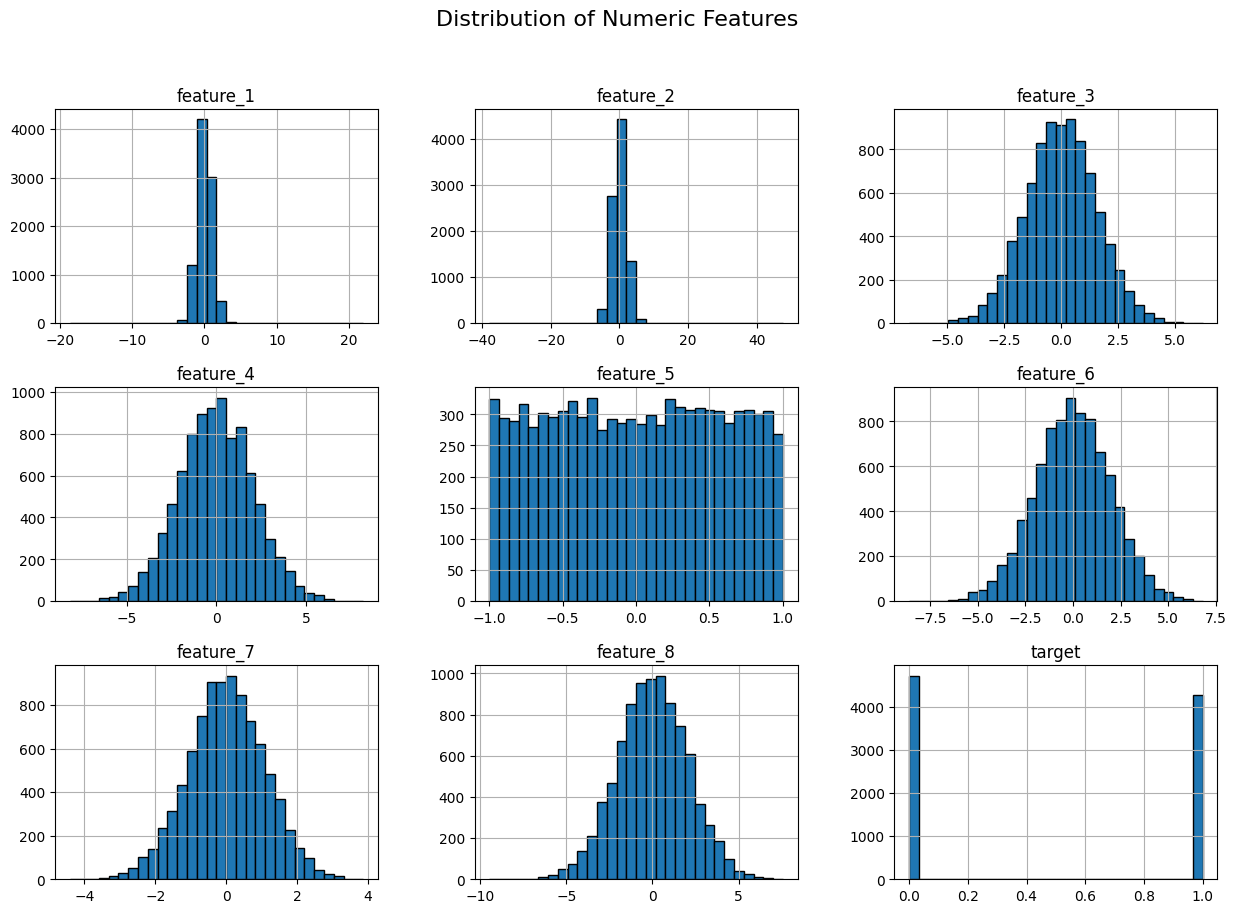

In [237]:
#histogram
df.hist(bins=30, figsize=(15,10), edgecolor='black')
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.show()

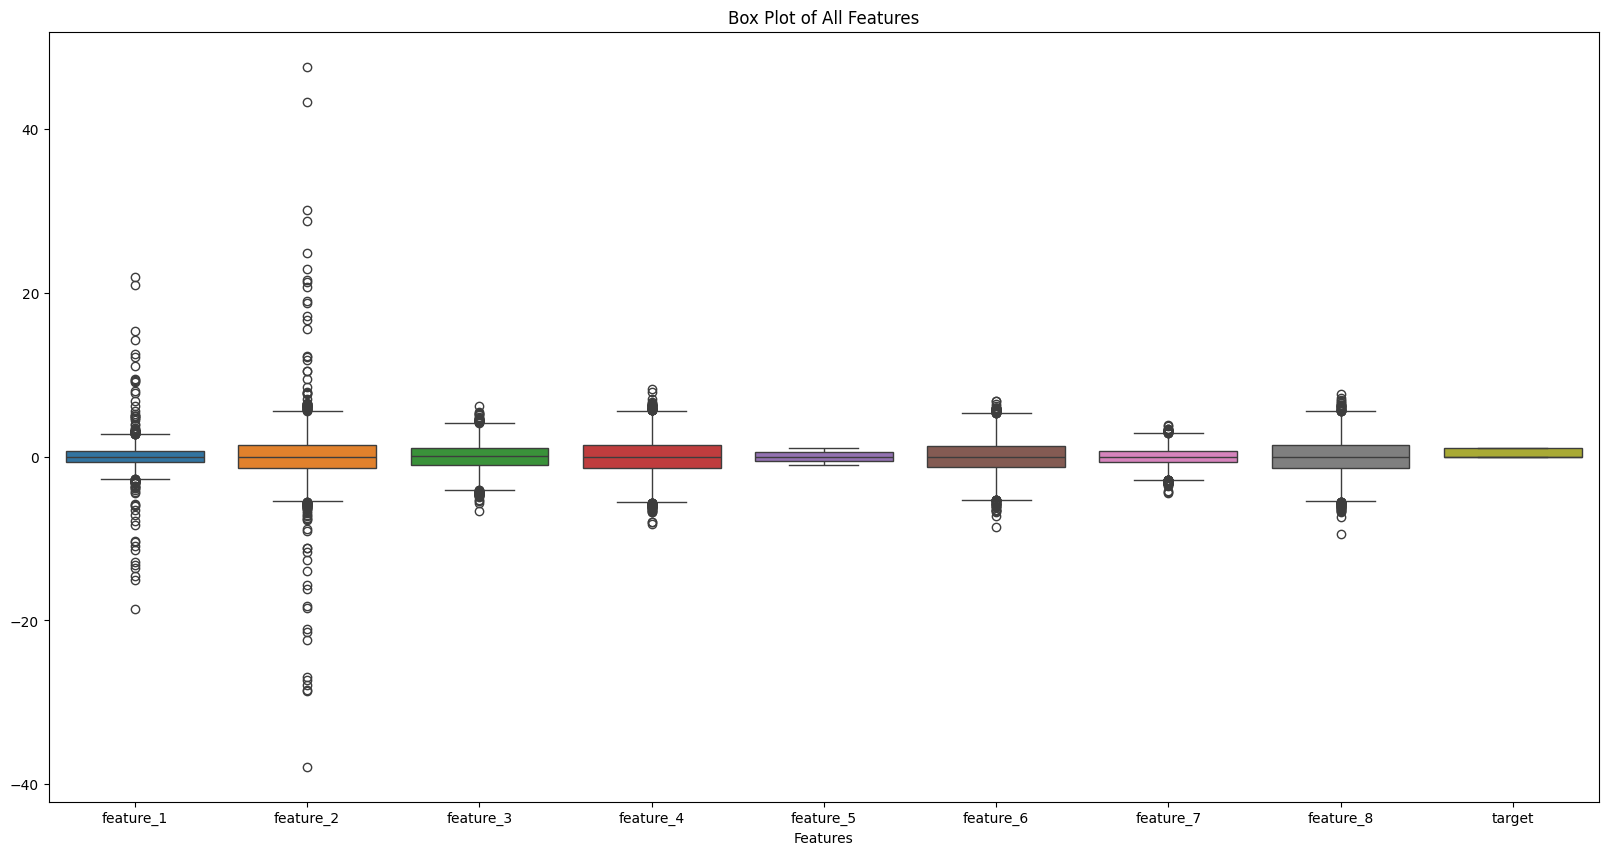

In [238]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.title("Box Plot of All Features")
plt.xlabel("Features")
plt.show()


In [239]:
#3. Analyze relationships between features using scatter plots and correlation matrices

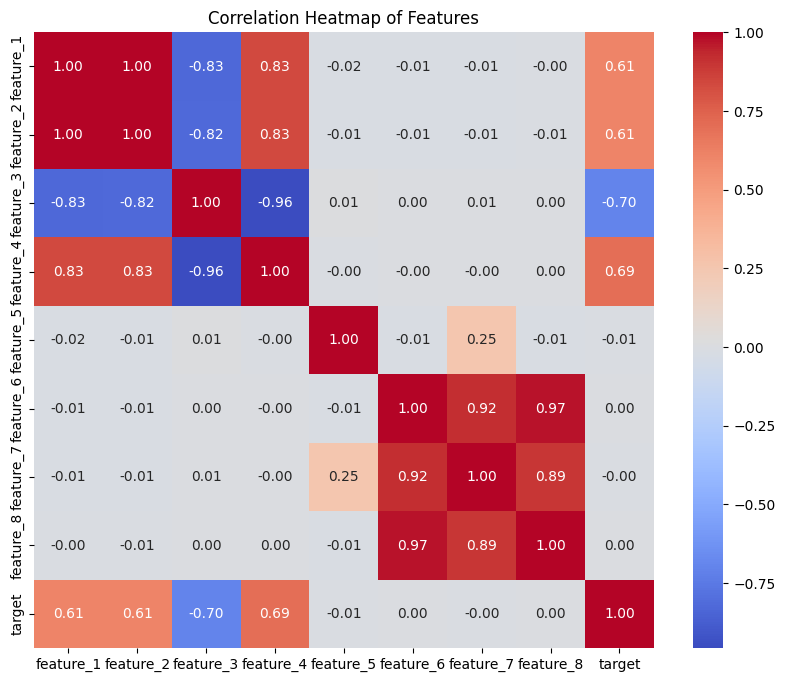

In [240]:
#correlation matrix
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix=df[numerical_features].corr()
#heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()
#With annot=True, the exact numerical values are displayed, without it will be only colors
#fmt=".2f" formats each number to two decimal places

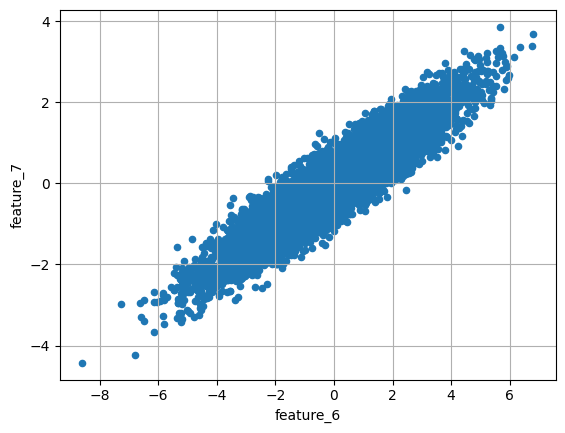

In [241]:
#scatterplot
df.plot(kind="scatter", x="feature_6", y="feature_7", grid=True)
plt.show()
#Almost perfectly correlated (0.92)

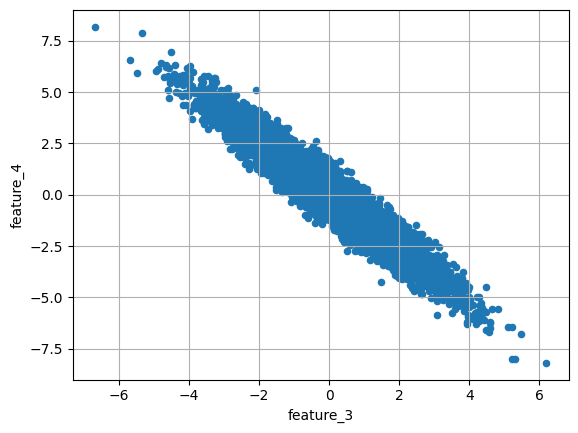

In [242]:
#scatterplot
df.plot(kind="scatter", x="feature_3", y="feature_4", grid=True)
plt.show()
#Strong negative correlation (-0.957).

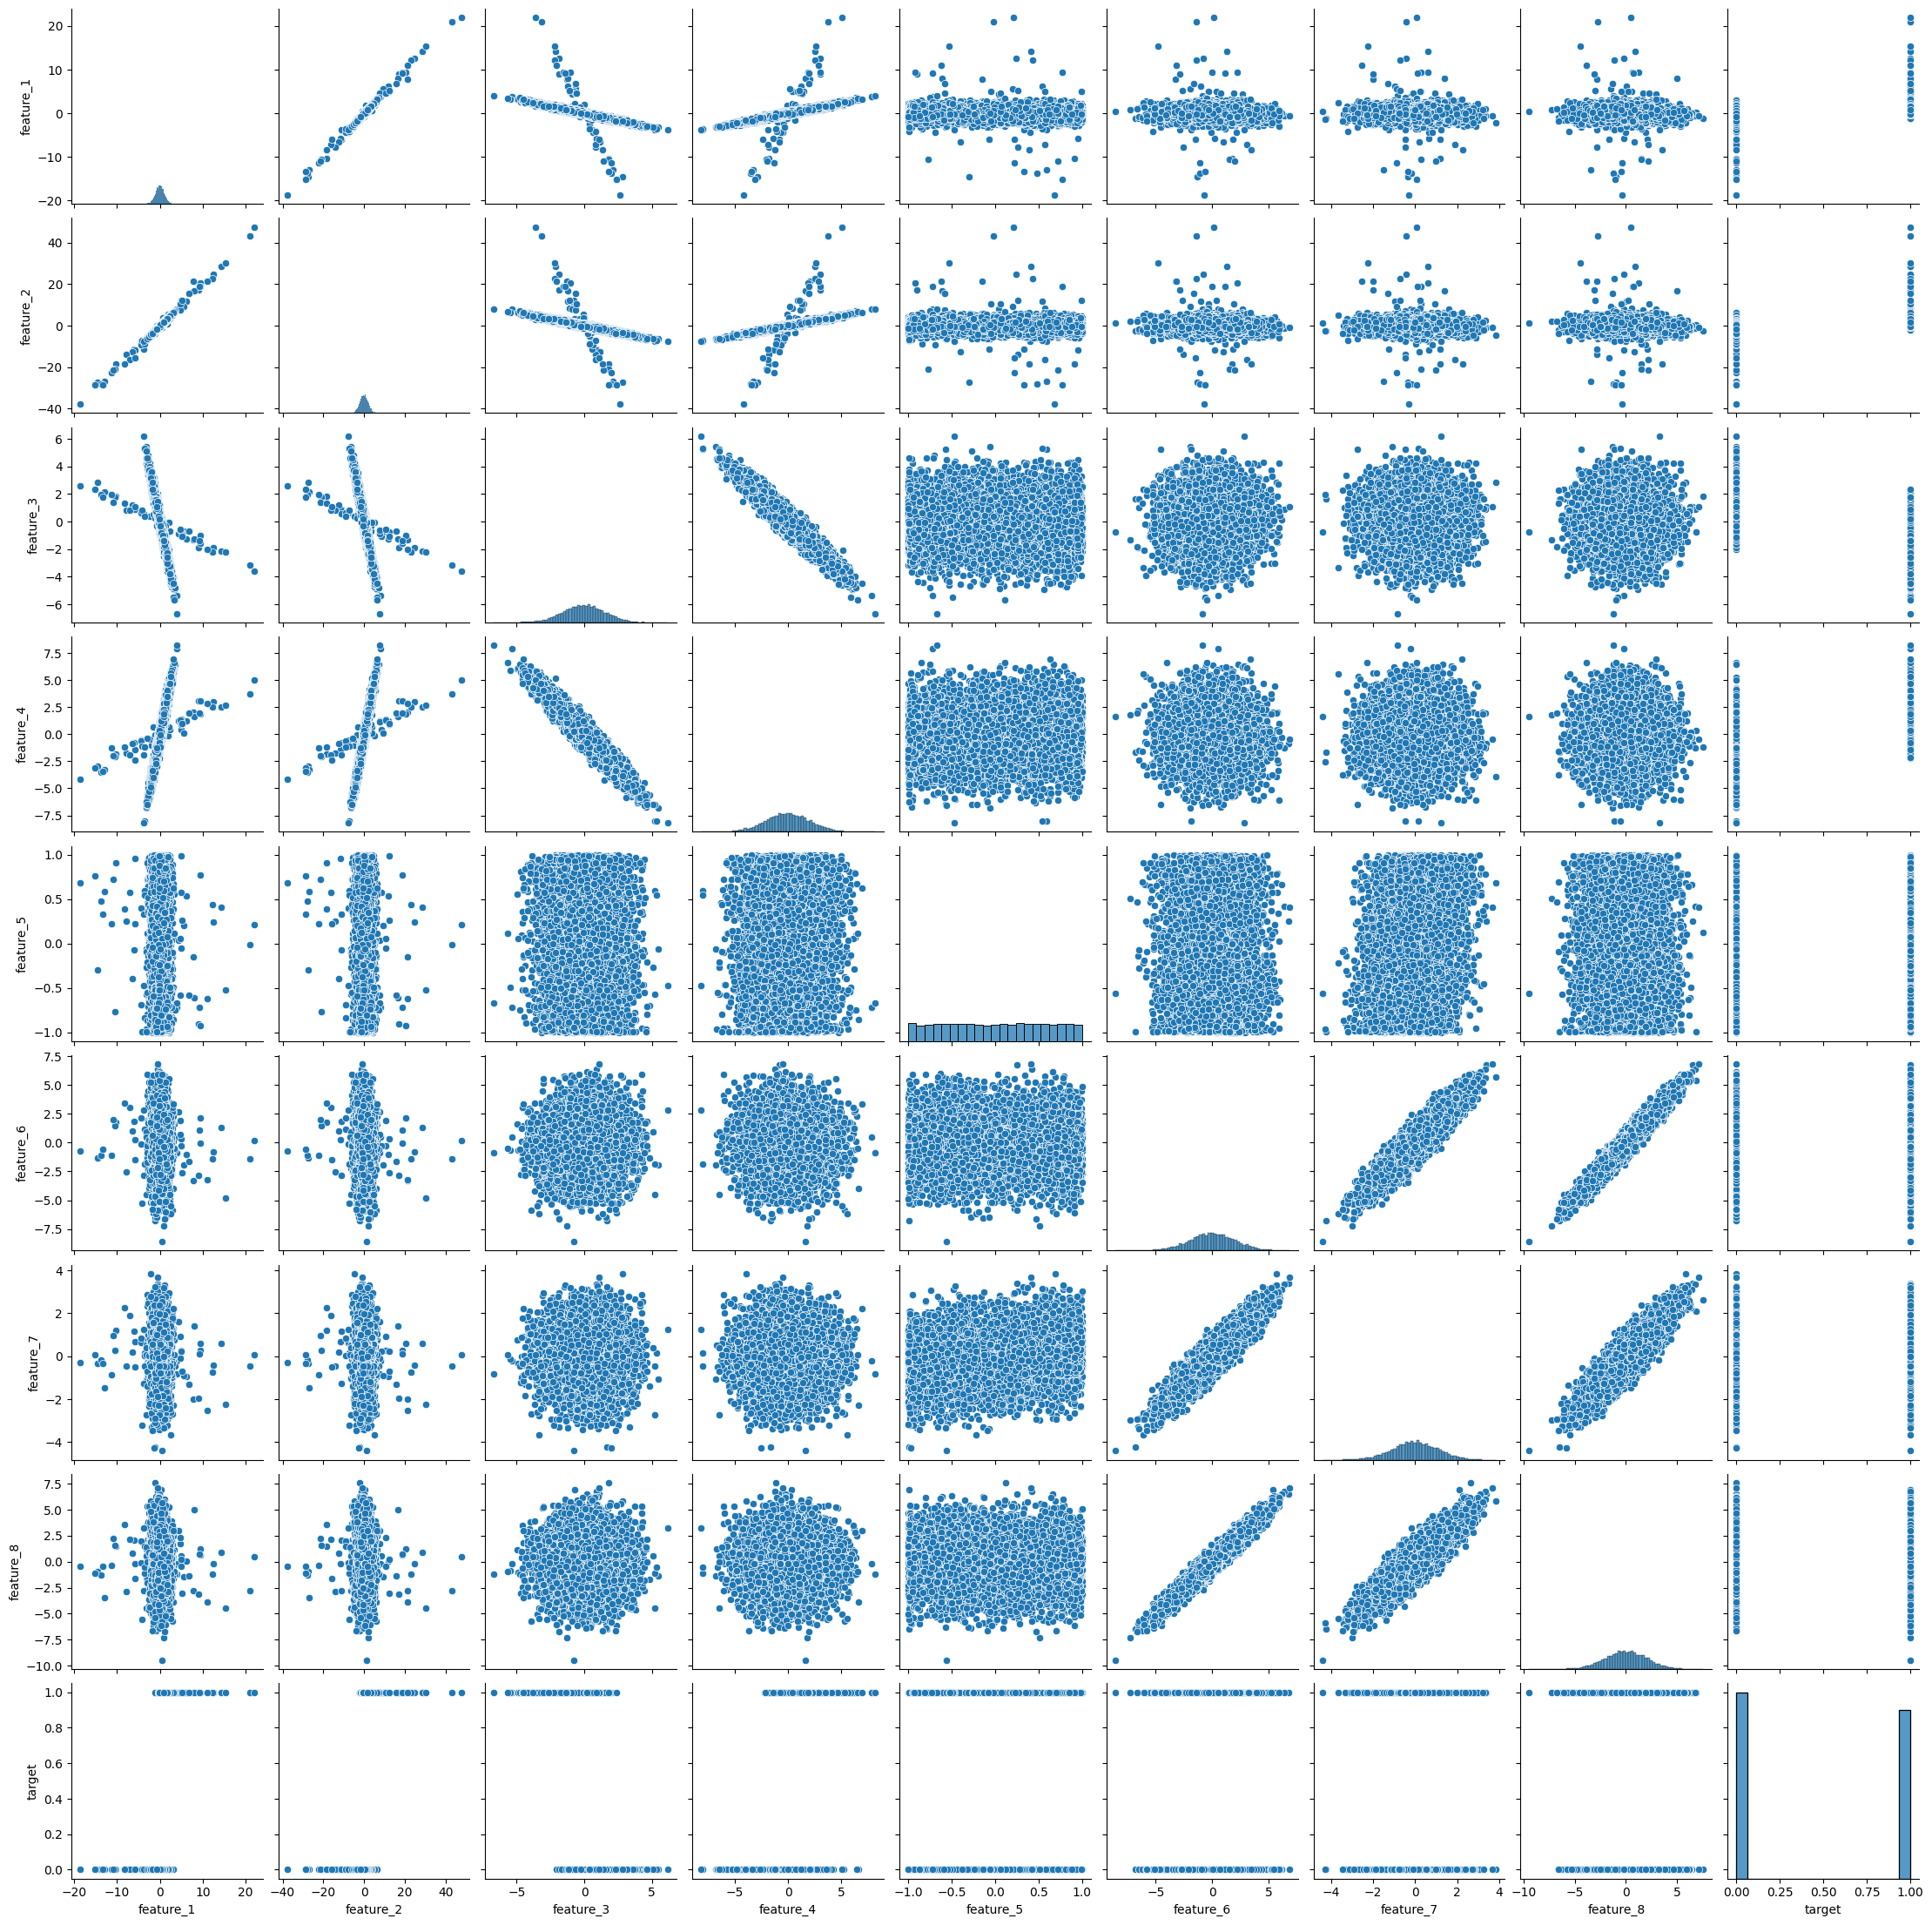

In [243]:
sns.pairplot(df[numerical_features])
plt.show()
#generates scatter plots for every pair of variables

## Data preprocessing

In [244]:
# handeling missing values
df['feature_3'] = df['feature_3'].fillna(df['feature_3'].median())
df['feature_6'] = df['feature_6'].fillna(df['feature_6'].median())

In [245]:
# detect and treat outliers

In [246]:
def clip_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.clip(lower=lower_bound, upper=upper_bound)
# column.clip(): Values below the lower_bound are set to the lower_bound.

In [247]:
numerical_features =[ 'feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8']

In [248]:
df[numerical_features] = df[numerical_features].apply(clip_outliers)

In [249]:
print(df.head())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.496714   1.146509  -0.648521   0.833005   0.784920  -2.209437   
1  -0.138264  -0.061846   0.005196   0.403768   0.704674  -2.498565   
2   0.647689   1.395115  -0.764126   1.708266  -0.250029   1.956259   
3   1.523030   2.657560  -2.461653   2.649051   0.882201   3.445638   
4  -0.234153  -0.499391   0.576097  -0.441656   0.610601   0.211425   

   feature_7  feature_8     category_1 category_2  target  
0  -1.300105  -2.242241  Above Average   Region C       1  
1  -1.339227  -1.942298  Below Average   Region A       0  
2   1.190238   1.503559           High   Region C       1  
3   2.120913   3.409035           High   Region B       1  
4   0.935759  -0.401463  Below Average   Region C       0  


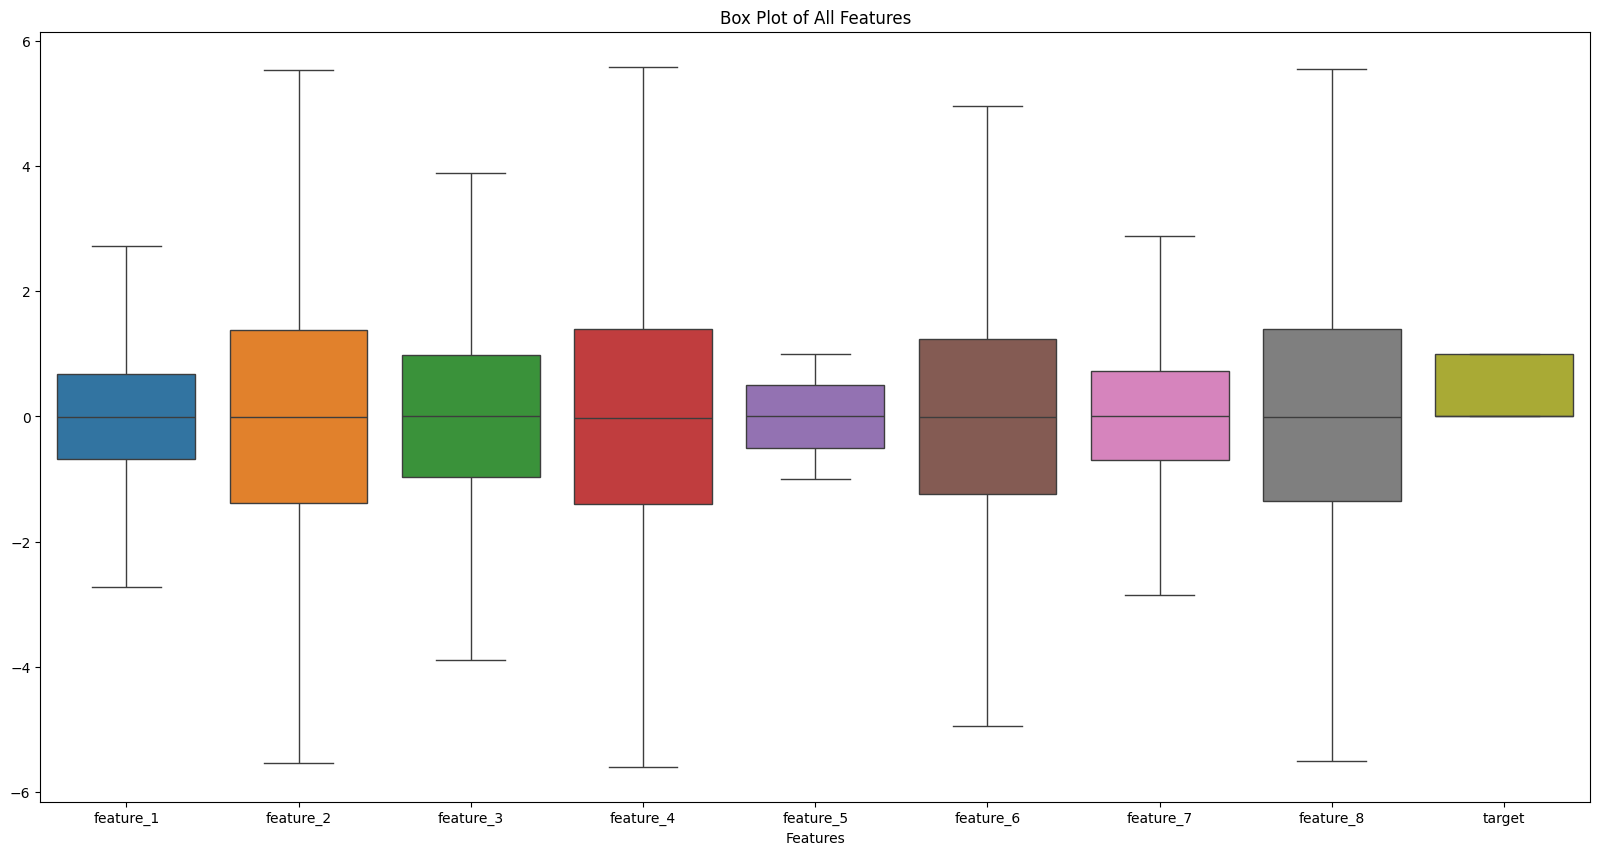

In [250]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.title("Box Plot of All Features")
plt.xlabel("Features")
plt.show()


In [251]:
# Encode categorical variables
df['category_1_original'] = df['category_1']
df['category_2_original'] = df['category_2']  # Keep the original column for later use

In [252]:
df.head(10)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,category_1,category_2,target,category_1_original,category_2_original
0,0.496714,1.146509,-0.648521,0.833005,0.784920,-2.209437,-1.300105,-2.242241,Above Average,Region C,1,Above Average,Region C
1,-0.138264,-0.061846,0.005196,0.403768,0.704674,-2.498565,-1.339227,-1.942298,Below Average,Region A,0,Below Average,Region A
2,0.647689,1.395115,-0.764126,1.708266,-0.250029,1.956259,1.190238,1.503559,High,Region C,1,High,Region C
3,1.523030,2.657560,-2.461653,2.649051,0.882201,3.445638,2.120913,3.409035,High,Region B,1,High,Region B
4,-0.234153,-0.499391,0.576097,-0.441656,0.610601,0.211425,0.935759,-0.401463,Below Average,Region C,0,Below Average,Region C
5,-0.234137,-0.699415,0.268972,-0.702775,0.702283,-0.332383,0.453958,-0.826721,Below Average,Region A,0,Below Average,Region A
6,1.579213,3.117904,-2.885133,3.312708,0.864708,2.045283,1.531547,1.771851,High,Region A,1,High,Region A
7,0.767435,1.730870,-1.445877,1.411070,0.874003,0.674730,0.812931,1.489838,High,Region A,1,High,Region A
8,-0.469474,-0.877919,0.575087,-0.532917,-0.519870,-0.003137,-2.848108,-4.779960,Below Average,Region A,0,Below Average,Region A
9,0.542560,1.314738,-0.403383,1.456165,-0.744625,1.987345,0.431966,3.309386,High,Region C,1,High,Region C


In [253]:

# Initialize LabelEncoder
encoder = LabelEncoder()

# Apply the encoder to the 'category1' column
df['category_1'] = encoder.fit_transform(df['category_1'])
#first we go in df(dataset) in category 1 then The encoder first learns (fits) how to handle the unique values in that column and then converts (transforms) each value into a numerical representation. The result is stored back in the category_1 column of df."
print(df)




      feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0      0.496714   1.146509  -0.648521   0.833005   0.784920  -2.209437   
1     -0.138264  -0.061846   0.005196   0.403768   0.704674  -2.498565   
2      0.647689   1.395115  -0.764126   1.708266  -0.250029   1.956259   
3      1.523030   2.657560  -2.461653   2.649051   0.882201   3.445638   
4     -0.234153  -0.499391   0.576097  -0.441656   0.610601   0.211425   
...         ...        ...        ...        ...        ...        ...   
8995   0.101630   0.400250   0.005196  -0.019412  -0.063150   0.077627   
8996   1.167218   2.177774  -1.716067   1.994835   0.350043  -0.544915   
8997   1.588447   3.333945  -2.615488   3.476880  -0.933276   2.027658   
8998  -0.684987  -1.599835   1.063341  -1.252109  -0.724001   2.228943   
8999   0.801182   1.808647  -1.383917   1.841776   0.702840  -0.339918   

      feature_7  feature_8  category_1 category_2  target category_1_original  \
0     -1.300105  -2.242241    

In [254]:
df.head(10)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,category_1,category_2,target,category_1_original,category_2_original
0,0.496714,1.146509,-0.648521,0.833005,0.784920,-2.209437,-1.300105,-2.242241,0,Region C,1,Above Average,Region C
1,-0.138264,-0.061846,0.005196,0.403768,0.704674,-2.498565,-1.339227,-1.942298,1,Region A,0,Below Average,Region A
2,0.647689,1.395115,-0.764126,1.708266,-0.250029,1.956259,1.190238,1.503559,2,Region C,1,High,Region C
3,1.523030,2.657560,-2.461653,2.649051,0.882201,3.445638,2.120913,3.409035,2,Region B,1,High,Region B
4,-0.234153,-0.499391,0.576097,-0.441656,0.610601,0.211425,0.935759,-0.401463,1,Region C,0,Below Average,Region C
5,-0.234137,-0.699415,0.268972,-0.702775,0.702283,-0.332383,0.453958,-0.826721,1,Region A,0,Below Average,Region A
6,1.579213,3.117904,-2.885133,3.312708,0.864708,2.045283,1.531547,1.771851,2,Region A,1,High,Region A
7,0.767435,1.730870,-1.445877,1.411070,0.874003,0.674730,0.812931,1.489838,2,Region A,1,High,Region A
8,-0.469474,-0.877919,0.575087,-0.532917,-0.519870,-0.003137,-2.848108,-4.779960,1,Region A,0,Below Average,Region A
9,0.542560,1.314738,-0.403383,1.456165,-0.744625,1.987345,0.431966,3.309386,2,Region C,1,High,Region C


In [255]:
# Encode category_2 using OneHotEncoder since its nominal

In [256]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming your dataset already has 'category_2' column
# Make sure 'category_2' is the column you want to encode

# Create one-hot encoder class
encoder = OneHotEncoder(sparse_output=False)
#the encoder will not return a sparse matrix. Instead, it will return a dense NumPy array

# Fit and transform the 'category_2' column
category_2_encoded = encoder.fit_transform(df[['category_2']])

#e transform method applies the actual encoding to the 'category_2' column. It converts each category into a row of binary values 
#fit method learns the unique categories
#: This first learns what the unique categories are in the category_2 column, then converts each category into a series of 0s and 1s (one-hot encoding).
#"he encoder will fit and transform the categories from the dataset.

# Convert the result to DataFrame and set column names to the categories
category_2_dummies = pd.DataFrame(category_2_encoded, columns=encoder.categories_[0], index=df.index)
#columns=encoder.categories_[0] is a list of unique categories for each input column
#index=df.index: Keep the same row order as in the original DataFrame df

# Concatenate the new columns with the original dataset and drop 'category_2'
df = pd.concat([df.drop('category_2', axis=1), category_2_dummies], axis=1)
#his line combines the original Dataset (without category_2) and the category 2 dummies

# Display the result
print(df)


      feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0      0.496714   1.146509  -0.648521   0.833005   0.784920  -2.209437   
1     -0.138264  -0.061846   0.005196   0.403768   0.704674  -2.498565   
2      0.647689   1.395115  -0.764126   1.708266  -0.250029   1.956259   
3      1.523030   2.657560  -2.461653   2.649051   0.882201   3.445638   
4     -0.234153  -0.499391   0.576097  -0.441656   0.610601   0.211425   
...         ...        ...        ...        ...        ...        ...   
8995   0.101630   0.400250   0.005196  -0.019412  -0.063150   0.077627   
8996   1.167218   2.177774  -1.716067   1.994835   0.350043  -0.544915   
8997   1.588447   3.333945  -2.615488   3.476880  -0.933276   2.027658   
8998  -0.684987  -1.599835   1.063341  -1.252109  -0.724001   2.228943   
8999   0.801182   1.808647  -1.383917   1.841776   0.702840  -0.339918   

      feature_7  feature_8  category_1  target category_1_original  \
0     -1.300105  -2.242241           0   

In [257]:
df.head(10)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,category_1,target,category_1_original,category_2_original,Region A,Region B,Region C
0,0.496714,1.146509,-0.648521,0.833005,0.784920,-2.209437,-1.300105,-2.242241,0,1,Above Average,Region C,0.0,0.0,1.0
1,-0.138264,-0.061846,0.005196,0.403768,0.704674,-2.498565,-1.339227,-1.942298,1,0,Below Average,Region A,1.0,0.0,0.0
2,0.647689,1.395115,-0.764126,1.708266,-0.250029,1.956259,1.190238,1.503559,2,1,High,Region C,0.0,0.0,1.0
3,1.523030,2.657560,-2.461653,2.649051,0.882201,3.445638,2.120913,3.409035,2,1,High,Region B,0.0,1.0,0.0
4,-0.234153,-0.499391,0.576097,-0.441656,0.610601,0.211425,0.935759,-0.401463,1,0,Below Average,Region C,0.0,0.0,1.0
5,-0.234137,-0.699415,0.268972,-0.702775,0.702283,-0.332383,0.453958,-0.826721,1,0,Below Average,Region A,1.0,0.0,0.0
6,1.579213,3.117904,-2.885133,3.312708,0.864708,2.045283,1.531547,1.771851,2,1,High,Region A,1.0,0.0,0.0
7,0.767435,1.730870,-1.445877,1.411070,0.874003,0.674730,0.812931,1.489838,2,1,High,Region A,1.0,0.0,0.0
8,-0.469474,-0.877919,0.575087,-0.532917,-0.519870,-0.003137,-2.848108,-4.779960,1,0,Below Average,Region A,1.0,0.0,0.0
9,0.542560,1.314738,-0.403383,1.456165,-0.744625,1.987345,0.431966,3.309386,2,1,High,Region C,0.0,0.0,1.0


In [258]:
from IPython.display import FileLink, FileLinks

# Save the dataset to a CSV file
df.to_csv("df.csv", index=False)

# Display download link
FileLink("df.csv")

/Users/maksatkaparov/Downloads/df.csv

## EDA

In [259]:
#Investigate the relationship between features and the target variable.
#numerical_features =[ 'feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8']
#df[numerical_features] = df[numerical_features].apply(clip_outliers)
categorical_features =['category_1_original','category_2_original','category_1','Region A','Region B','Region C']

In [260]:
print(df.dtypes)

feature_1              float64
feature_2              float64
feature_3              float64
feature_4              float64
feature_5              float64
feature_6              float64
feature_7              float64
feature_8              float64
category_1               int64
target                   int64
category_1_original     object
category_2_original     object
Region A               float64
Region B               float64
Region C               float64
dtype: object


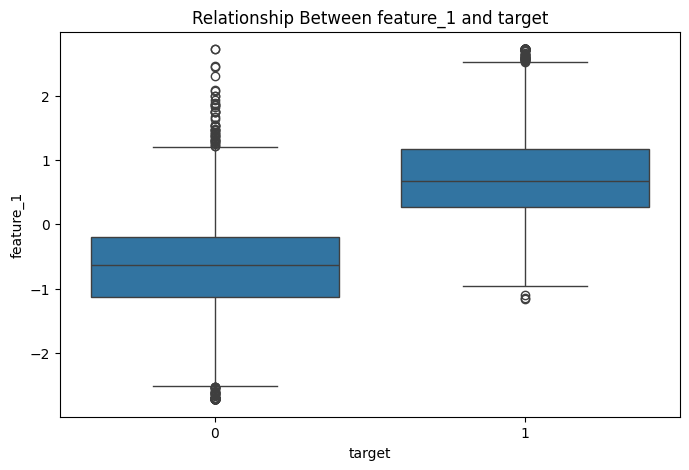

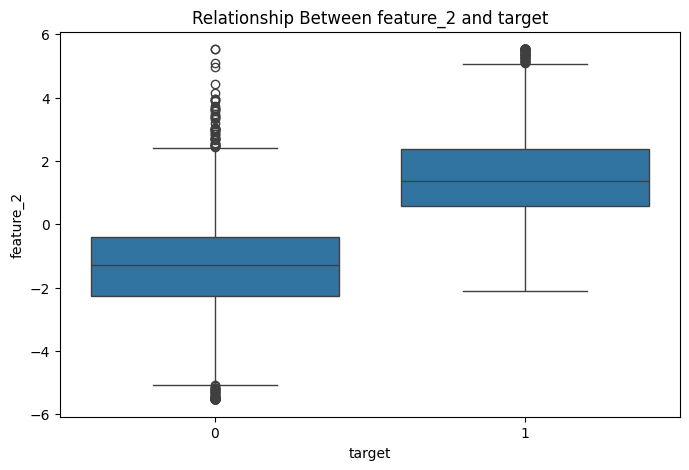

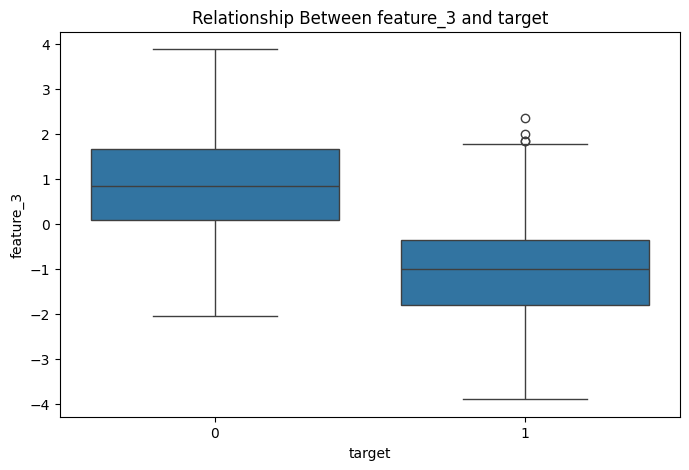

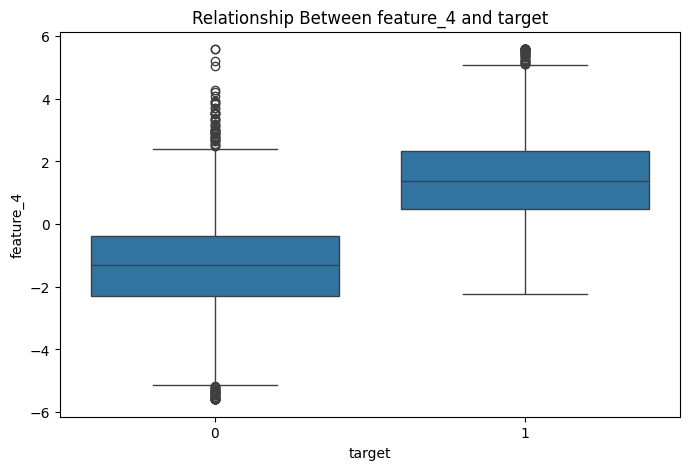

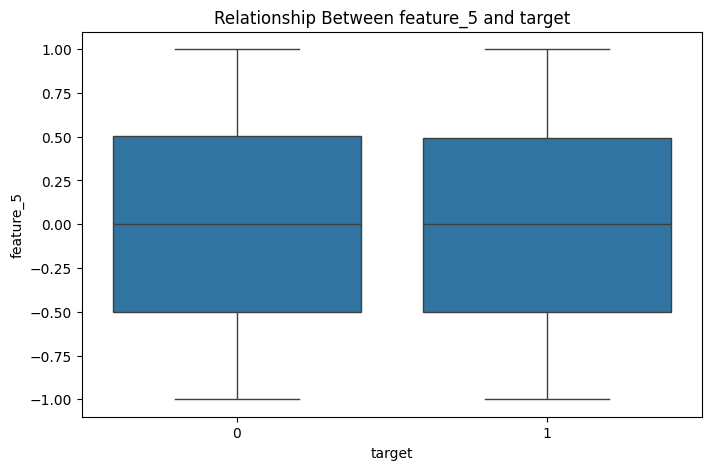

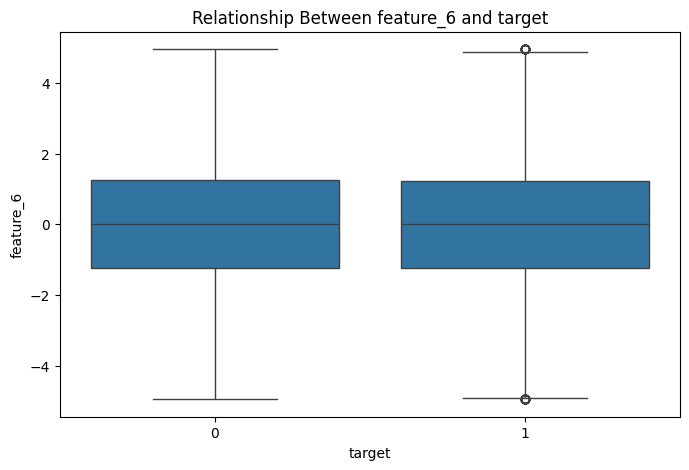

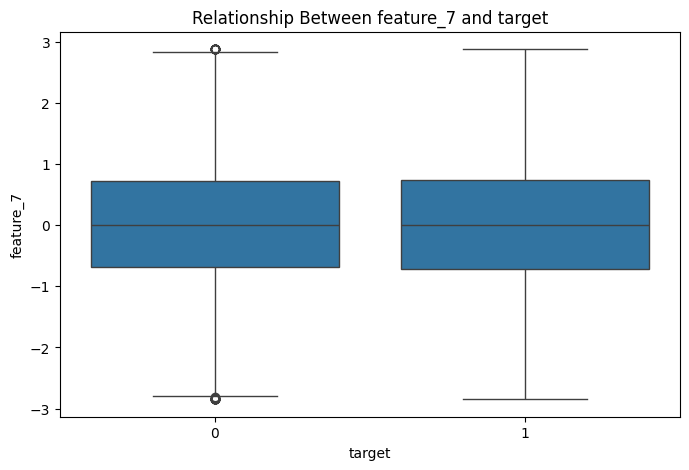

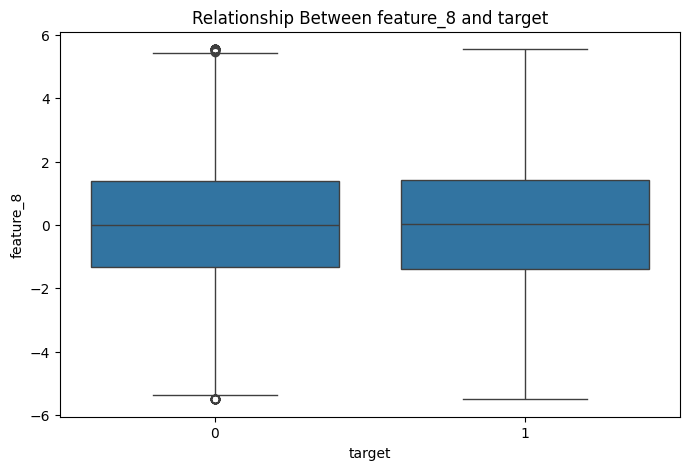

In [261]:
# Investigate relationships between numerical features and the target
for feature in numerical_features:
    if feature != 'target':
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df['target'], y=df[feature])  
        plt.title(f"Relationship Between {feature} and target")
        plt.xlabel('target')
        plt.ylabel(feature)
        plt.show()
        # outlier treatment clips extreme values within each numerical feature but does not consider their relationship with the target variable.
    #If the target variable is binary (0 or 1), boxplots don't provide meaningful information. so doesnt make sense for cats


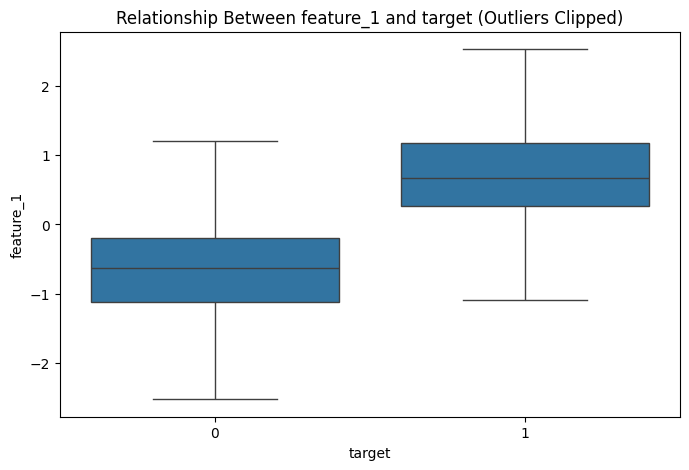

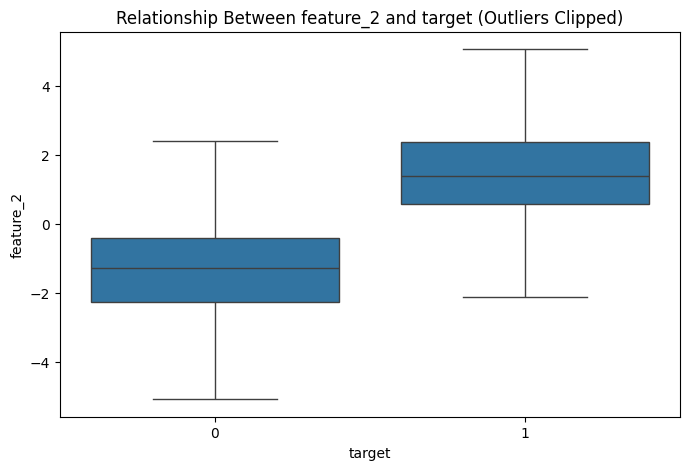

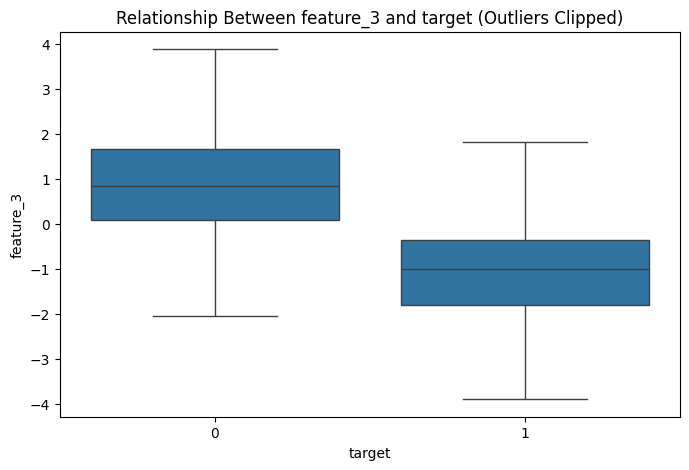

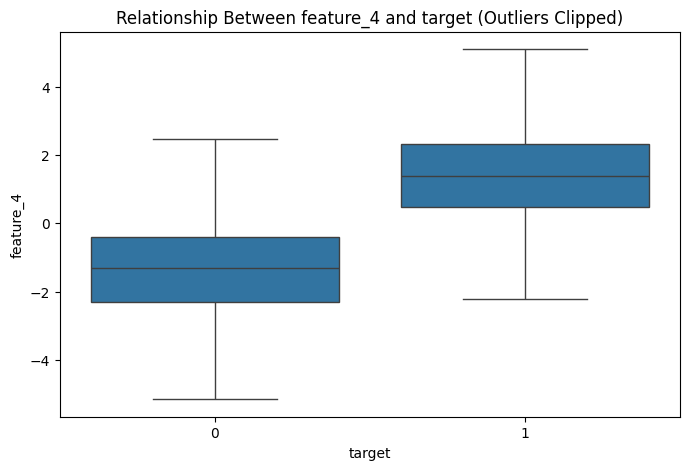

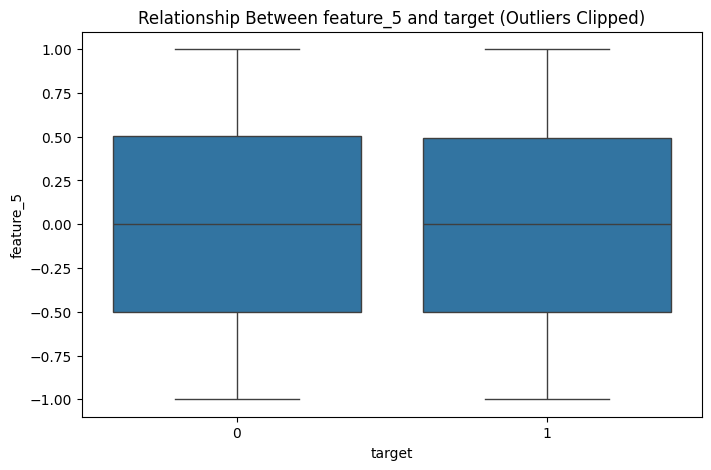

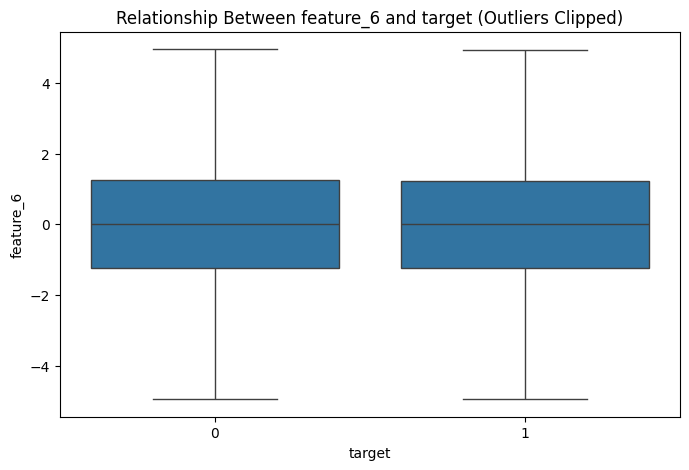

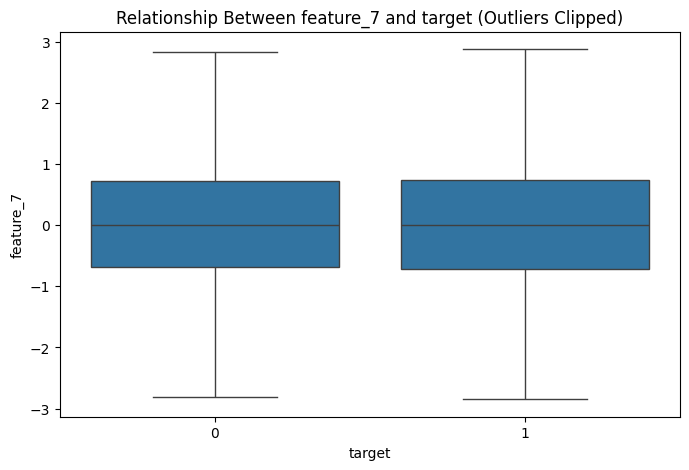

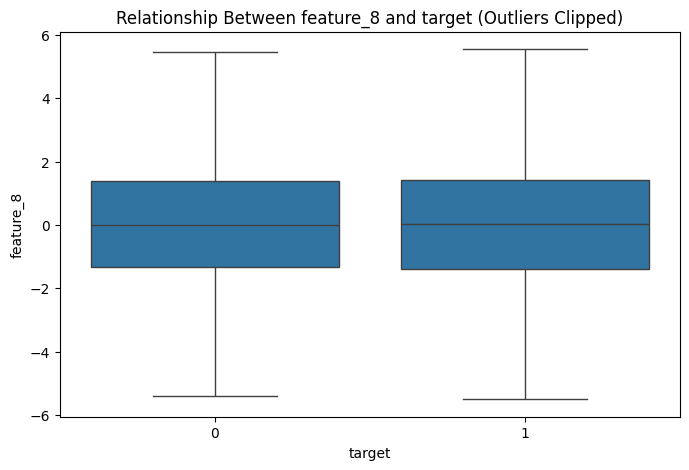

In [262]:
def clip_outliers_grouped(df, feature, target):
    df_clipped = df.copy()
    for target_value in df[target].unique():
        subset = df[df[target] == target_value][feature]  # Get values for specific target group
        Q1 = subset.quantile(0.25)
        Q3 = subset.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clipped.loc[df[target] == target_value, feature] = subset.clip(lower_bound, upper_bound)
    return df_clipped

# Apply this function to all numerical features
for feature in numerical_features:
    if feature != 'target':
        df = clip_outliers_grouped(df, feature, 'target')

# Now plot the boxplots again
for feature in numerical_features:
    if feature != 'target':
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df['target'], y=df[feature])  
        plt.title(f"Relationship Between {feature} and target (Outliers Clipped)")
        plt.xlabel('target')
        plt.ylabel(feature)
        plt.show()


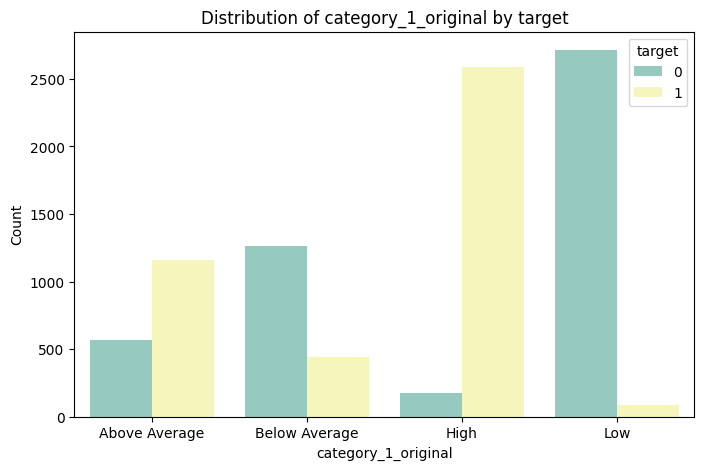

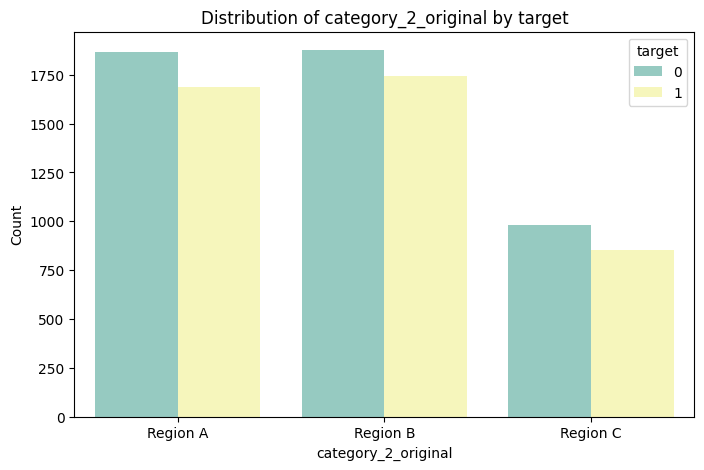

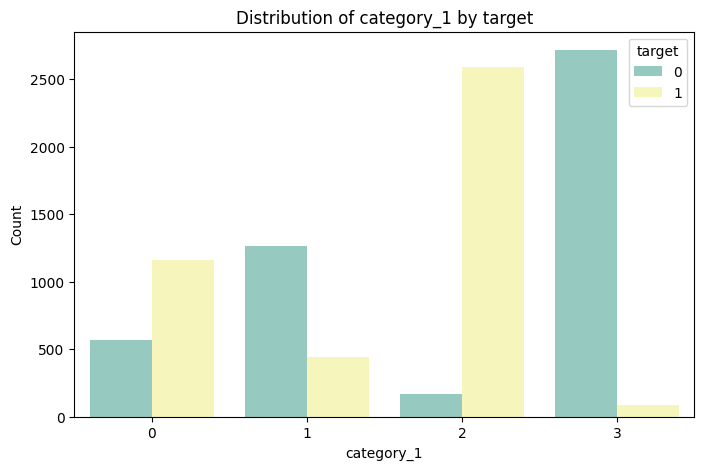

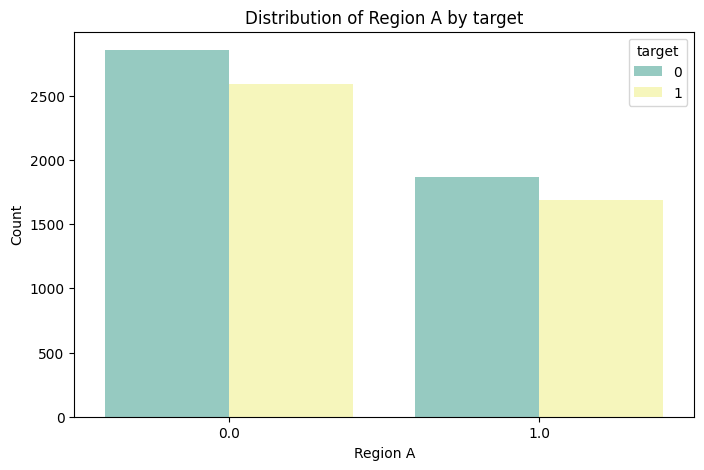

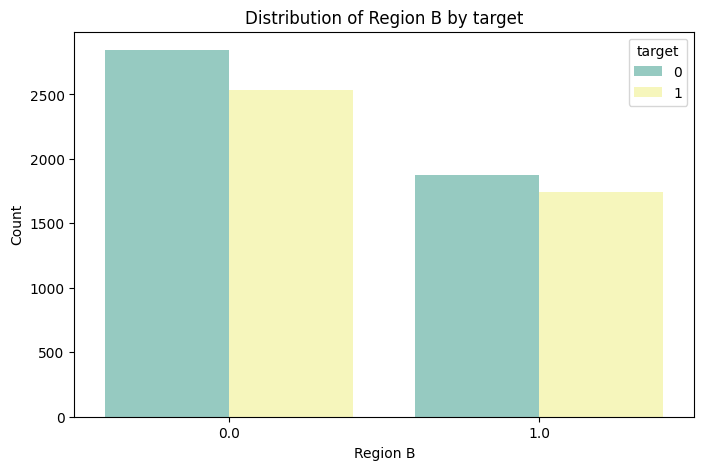

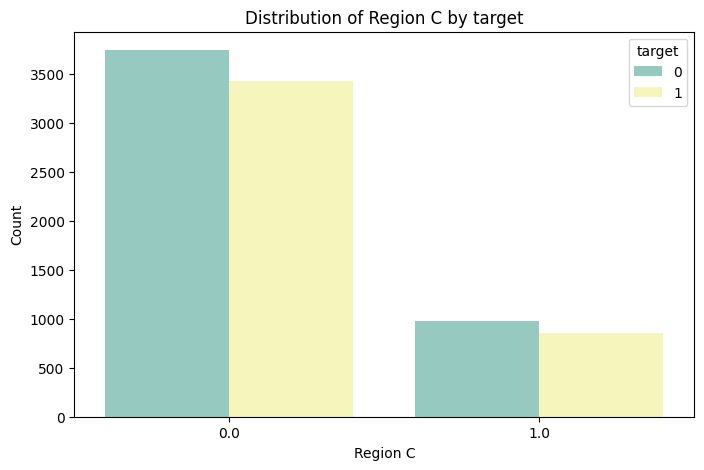

In [263]:
# Investigate relationships between categorical features and the target
#determine which category has a stronger effect on the binary target (0 or 1).
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    category_effect = df.groupby([feature, 'target']).size().reset_index(name='Count')
    sns.barplot(x=feature, y='Count', hue='target', data=category_effect, palette="Set3")
    plt.title(f"Distribution of {feature} by target")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()
#'above average' is more likely to lead to target 1. So, it has a stronger effect on target 1.

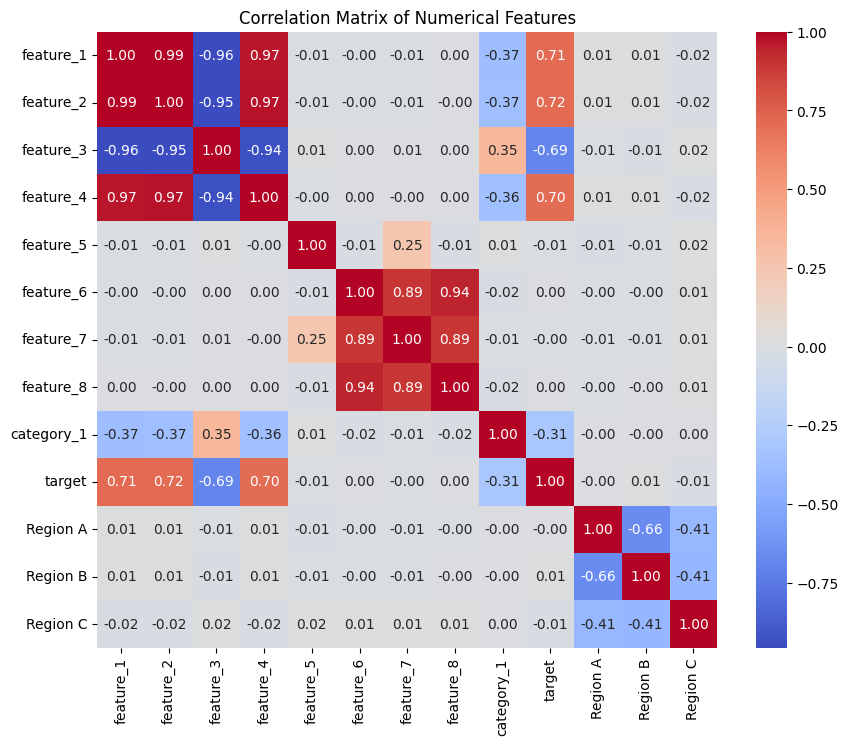

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'category_1', 'target',
       'Region A', 'Region B', 'Region C'],
      dtype='object')


In [264]:
numerical_features = df.select_dtypes(include=['int64', 'float64', 'int32']).columns
# int32 for cat_1
# Generate a heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()
print(numerical_features)

In [265]:
#chi square

In [266]:
X_categorical = df[['category_1', 'Region A', 'Region B', 'Region C']]
Y = df['target']  # Replace 'target' with the actual name of the target column

# Perform the chi-square test
chi_scores, p_values = chi2(X_categorical, Y)

# Create a DataFrame to store the results
chi_square_results = pd.DataFrame({
    'Feature': X_categorical.columns,
    'Chi-Square Score': chi_scores,
    'p-value': p_values
}).sort_values(by='p-value')
chi_square_results['p-value'] = chi_square_results['p-value'].apply(lambda x: f'{x:.50f}')
# Print the results
print("Chi-Square Test Results:")
print(chi_square_results)

Chi-Square Test Results:
      Feature  Chi-Square Score  \
0  category_1        615.102376   
3    Region C          0.836017   
2    Region B          0.481414   
1    Region A          0.001918   

                                             p-value  
0  0.00000000000000000000000000000000000000000000...  
3  0.36053836459497612398905630470835603773593902...  
2  0.48778241130825417126715137783321551978588104...  
1  0.96506998488490425280872386792907491326332092...  


In [267]:
print(df.columns)

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'category_1', 'target',
       'category_1_original', 'category_2_original', 'Region A', 'Region B',
       'Region C'],
      dtype='object')


In [268]:
#t - teset
num_features=['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8']
from scipy import stats
group_0 = df[df['target'] == 0]
group_1 = df[df['target'] == 1]

t_test_results = []

# Iterate through numerical features
for feature in num_features:
    t_stat, p_value = ttest_ind(group_0[feature], group_1[feature], equal_var=False, nan_policy='omit')
    t_test_results.append([feature, t_stat, p_value])

# Convert results to a DataFrame
t_test_results_df = pd.DataFrame(t_test_results, columns=['Feature', 'T-statistic', 'P-value'])

# Display the results

print(t_test_results_df)

#The t-test is used to compare the means of numerical features (independent variables) between the two groups (defined by the target). If you include the target itself as a feature, you’re comparing the target against itself, which doesn’t provide useful insights.



     Feature  T-statistic   P-value
0  feature_1   -96.387475  0.000000
1  feature_2   -97.338811  0.000000
2  feature_3    91.256411  0.000000
3  feature_4   -94.384369  0.000000
4  feature_5     0.747095  0.455026
5  feature_6    -0.174519  0.861461
6  feature_7     0.201970  0.839945
7  feature_8    -0.469063  0.639036


## Feature Engineering

In [269]:
df['f1_f2'] = df['feature_1'] * df['feature_2']
df['f2_f3'] = df['feature_3'] * df['feature_4']
df['f1_f2_sum'] = df['feature_1'] + df['feature_2']
df['f2_f4_sum'] = df['feature_2'] + df['feature_4']
df['f4_squared'] = df['feature_4'] ** 2

In [270]:
# Domain Knowledge Features (Example: Total Service Usage)
df['total'] = df[['feature_1', 'feature_2', 'feature_3', 'feature_4']].sum(axis=1)
df['avg'] = df[['feature_1', 'feature_2', 'feature_3', 'feature_4']].mean(axis=1)
df['max'] = df[['feature_1', 'feature_2', 'feature_3', 'feature_4']].max(axis=1)
df['min'] = df[['feature_1', 'feature_2', 'feature_3', 'feature_4']].min(axis=1)

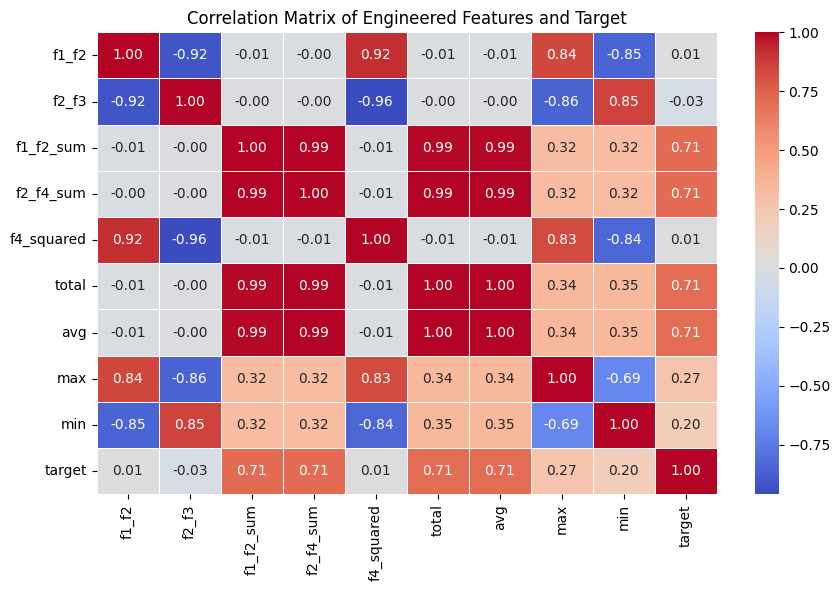

In [271]:
engineered_features = [
    'f1_f2', 'f2_f3', 'f1_f2_sum', 'f2_f4_sum', 'f4_squared',
    'total', 'avg', 'max', 'min', 'target'
]

# Compute the correlation matrix
correlation_matrix = df[engineered_features].corr()
plt.figure(figsize=(10, 6))

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set title
plt.title("Correlation Matrix of Engineered Features and Target")

# Show plot
plt.show()

In [272]:
#delete f1_f2, f2_f3, f4_squared, max, min

In [273]:
df.drop(['f1_f2', 'f2_f3', 'f4_squared', 'max','min'], axis=1, inplace=True)

In [274]:
#before Modelling drop categoricals
df.drop(['category_1_original', 'category_2_original'], axis=1, inplace=True)

In [275]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=["target"])  
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

#model.feature_importances_: Measures how important each feature is by calculating the contribution of each feature to decision-making in the trees.
#measures how much each feature contributes to making accurate predictions.
importances = model.feature_importances_
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Display feature importance
print(feature_importance)


       Feature  Importance
15         avg    0.146303
1    feature_2    0.145375
12   f1_f2_sum    0.131884
13   f2_f4_sum    0.118359
14       total    0.103829
2    feature_3    0.102141
0    feature_1    0.082038
3    feature_4    0.044821
4    feature_5    0.028010
6    feature_7    0.025340
7    feature_8    0.024790
5    feature_6    0.024659
8   category_1    0.012011
9     Region A    0.003696
10    Region B    0.003491
11    Region C    0.003254


In [276]:
df.drop(['feature_5', 'feature_6', 'feature_7', 'feature_8','Region A','Region B','Region C'], axis=1, inplace=True)

In [277]:
df.head(10)

,feature_1,feature_2,feature_3,feature_4,category_1,target,f1_f2_sum,f2_f4_sum,total,avg
0,0.496714,1.146509,-0.648521,0.833005,0,1,1.643223,1.979513,1.827707,0.456927
1,-0.138264,-0.061846,0.005196,0.403768,1,0,-0.200110,0.341922,0.208854,0.052213
2,0.647689,1.395115,-0.764126,1.708266,2,1,2.042804,3.103381,2.986944,0.746736
3,1.523030,2.657560,-2.461653,2.649051,2,1,4.180590,5.306611,4.367988,1.091997
4,-0.234153,-0.499391,0.576097,-0.441656,1,0,-0.733545,-0.941048,-0.599104,-0.149776
5,-0.234137,-0.699415,0.268972,-0.702775,1,0,-0.933552,-1.402190,-1.367355,-0.341839
6,1.579213,3.117904,-2.885133,3.312708,2,1,4.697117,6.430613,5.124692,1.281173
7,0.767435,1.730870,-1.445877,1.411070,2,1,2.498305,3.141940,2.463498,0.615874
8,-0.469474,-0.877919,0.575087,-0.532917,1,0,-1.347393,-1.410835,-1.305223,-0.326306
9,0.542560,1.314738,-0.403383,1.456165,2,1,1.857298,2.770903,2.910080,0.727520


In [278]:
from IPython.display import FileLink, FileLinks

# Save the dataset to a CSV file
df.to_csv("new.csv", index=False)

# Display download link
FileLink("new.csv")

/Users/maksatkaparov/Downloads/new.csv

## Modeling

In [279]:
X = df.drop('target', axis=1)  # Features 
Y = df['target']  # Target variable (we want to predict) 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Training Features Shape:", X_train.shape)
print("Training Labels Shape:", Y_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Testing Labels Shape:", Y_test.shape)

Training Features Shape: (7200, 9)
Training Labels Shape: (7200,)
Testing Features Shape: (1800, 9)
Testing Labels Shape: (1800,)


In [280]:
scaler = StandardScaler()
#StandardScaler standardizes features by  transforming them to have mean=0 & standard deviation = 1

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (7200, 9)
X_test_scaled shape: (1800, 9)


In [281]:
def train_evaluate_plot(model, model_name, X_train_scaled, X_test_scaled, Y_train, Y_test):
    model.fit(X_train_scaled, Y_train)
    Y_pred = model.predict(X_test_scaled)

    print(f'{model_name} accuracy: {accuracy_score(Y_test, Y_pred):.4f}')

    if hasattr(model, "predict_proba"):
        Y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        print(f'{model_name} ROC-AUC: {roc_auc_score(Y_test, Y_pred_proba):.4f}\n')
        
    fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    print(classification_report(Y_test, Y_pred))
    sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    

Logistic Regression accuracy: 0.8583
Logistic Regression ROC-AUC: 0.9372



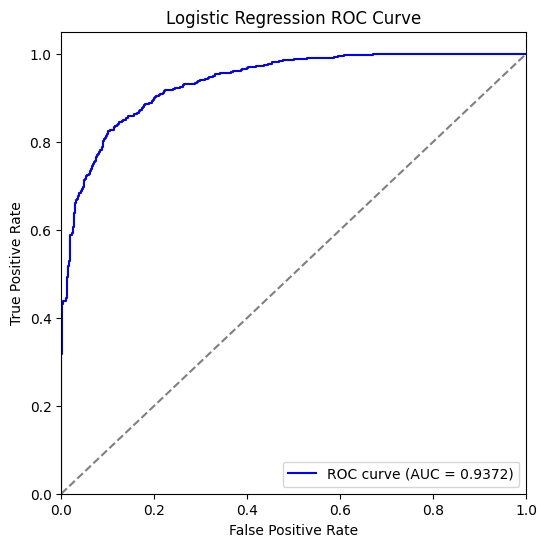

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       947
           1       0.85      0.85      0.85       853

    accuracy                           0.86      1800
   macro avg       0.86      0.86      0.86      1800
weighted avg       0.86      0.86      0.86      1800



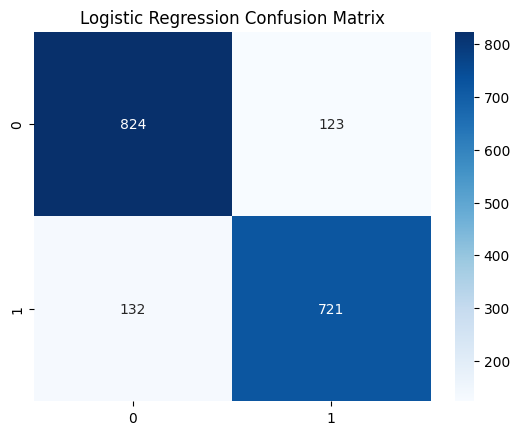

In [282]:
# Logistic Regression
train_evaluate_plot(LogisticRegression(random_state=42), "Logistic Regression", X_train_scaled, X_test_scaled, Y_train, Y_test)

Decision Tree accuracy: 0.8350
Decision Tree ROC-AUC: 0.8344



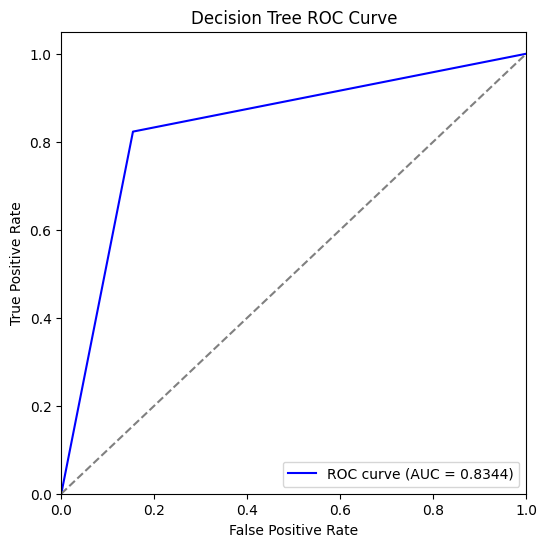

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       947
           1       0.83      0.82      0.83       853

    accuracy                           0.83      1800
   macro avg       0.83      0.83      0.83      1800
weighted avg       0.83      0.83      0.83      1800



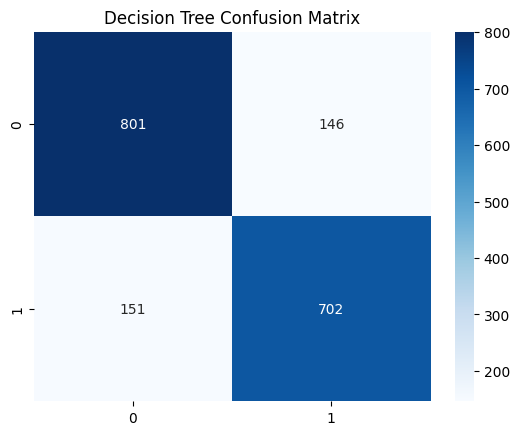

In [283]:
# Decision Tree
train_evaluate_plot(DecisionTreeClassifier(random_state=42), "Decision Tree", X_train_scaled, X_test_scaled, Y_train, Y_test)

Random Forest accuracy: 0.8817
Random Forest ROC-AUC: 0.9515



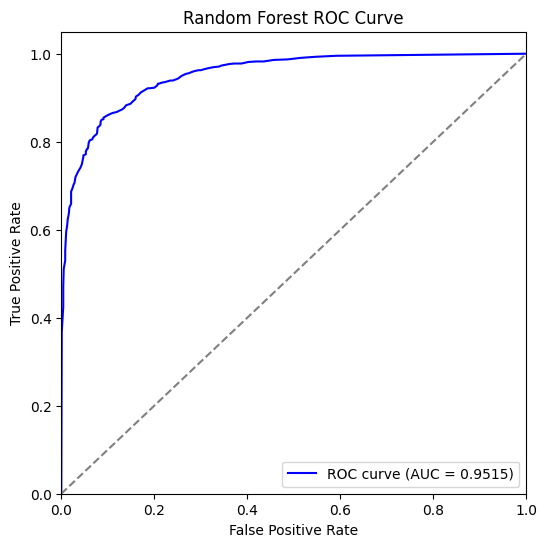

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       947
           1       0.89      0.85      0.87       853

    accuracy                           0.88      1800
   macro avg       0.88      0.88      0.88      1800
weighted avg       0.88      0.88      0.88      1800



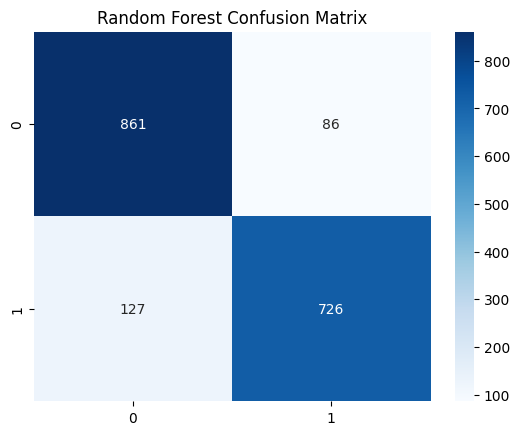

In [284]:
# Random Forest
train_evaluate_plot(RandomForestClassifier(random_state=42), "Random Forest", X_train_scaled, X_test_scaled, Y_train, Y_test)

Gradient Boosting accuracy: 0.8822
Gradient Boosting ROC-AUC: 0.9581



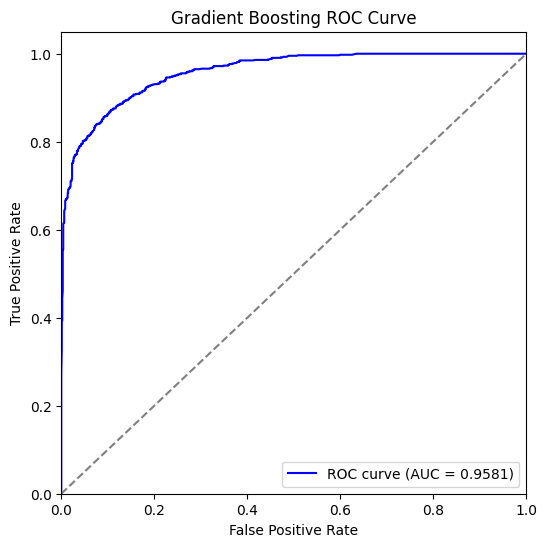

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       947
           1       0.89      0.85      0.87       853

    accuracy                           0.88      1800
   macro avg       0.88      0.88      0.88      1800
weighted avg       0.88      0.88      0.88      1800



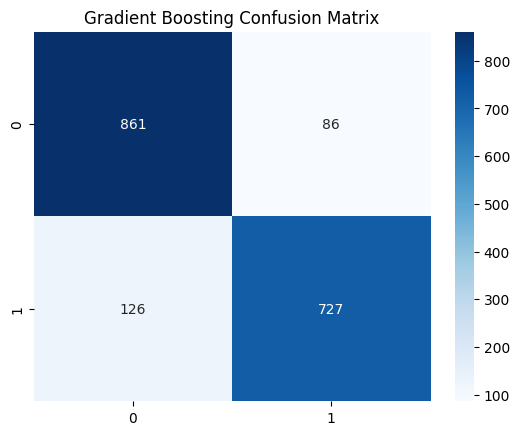

In [285]:
# Gradient Boosting
train_evaluate_plot(GradientBoostingClassifier(random_state=42), "Gradient Boosting", X_train_scaled, X_test_scaled, Y_train, Y_test)

AdaBoost accuracy: 0.8644
AdaBoost ROC-AUC: 0.9479



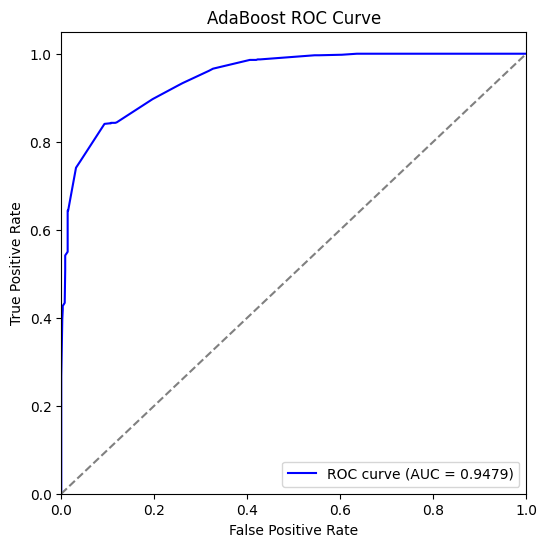

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       947
           1       0.87      0.84      0.85       853

    accuracy                           0.86      1800
   macro avg       0.86      0.86      0.86      1800
weighted avg       0.86      0.86      0.86      1800



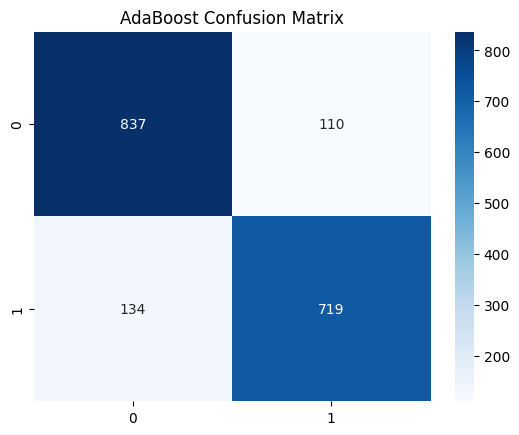

In [286]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Define and train AdaBoost model
ada_boost_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                                     n_estimators=50, random_state=42)

train_evaluate_plot(ada_boost_model, "AdaBoost", X_train_scaled, X_test_scaled, Y_train, Y_test)


In [287]:
from sklearn.model_selection import KFold, cross_validate

def cross_validate_model(model, model_name, X_train_scaled, Y_train):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scoring_metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']

    cv_results = cross_validate(model, X_train_scaled, Y_train, cv=cv, scoring=scoring_metrics)

    print(f"Cross-validation results for {model_name}:")
    for metric in scoring_metrics:
        scores = cv_results[f'test_{metric}']
        print(f"{metric.capitalize()}: {scores.mean():.4f} (± {scores.std():.4f})")
    print()


In [288]:
from sklearn.model_selection import KFold, cross_validate
from xgboost import XGBClassifier
from sklearn.base import is_classifier

def cross_validate_model(model, model_name, X_train_scaled, Y_train):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scoring_metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']

    # Ensure the model is a classifier
    if not is_classifier(model):
        print(f"{model_name} is not a classifier. Skipping cross-validation.")
        return
    
    # Perform cross-validation
    cv_results = cross_validate(model, X_train_scaled, Y_train, cv=cv, scoring=scoring_metrics)
    
    print(f"Cross-validation results for {model_name}:")
    for metric in scoring_metrics:
        if f'test_{metric}' in cv_results:  # Check if the metric is available in the results
            scores = cv_results[f'test_{metric}']
            print(f"{metric.capitalize()}: {scores.mean():.4f} (± {scores.std():.4f})")
        else:
            print(f"{metric.capitalize()}: Metric not supported by the model")
    print()

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42),  

}

for model_name, model in models.items():
    cross_validate_model(model, model_name, X_train_scaled, Y_train)


Cross-validation results for Logistic Regression:
Accuracy: 0.8583 (± 0.0044)
Precision_weighted: 0.8588 (± 0.0040)
Recall_weighted: 0.8583 (± 0.0044)
F1_weighted: 0.8584 (± 0.0044)
Roc_auc: 0.9363 (± 0.0023)

Cross-validation results for Decision Tree:
Accuracy: 0.8404 (± 0.0063)
Precision_weighted: 0.8407 (± 0.0063)
Recall_weighted: 0.8404 (± 0.0063)
F1_weighted: 0.8404 (± 0.0065)
Roc_auc: 0.8399 (± 0.0069)

Cross-validation results for Random Forest:
Accuracy: 0.8782 (± 0.0080)
Precision_weighted: 0.8785 (± 0.0082)
Recall_weighted: 0.8782 (± 0.0080)
F1_weighted: 0.8781 (± 0.0080)
Roc_auc: 0.9517 (± 0.0040)

Cross-validation results for Gradient Boosting:
Accuracy: 0.8858 (± 0.0038)
Precision_weighted: 0.8862 (± 0.0040)
Recall_weighted: 0.8858 (± 0.0038)
F1_weighted: 0.8857 (± 0.0038)
Roc_auc: 0.9591 (± 0.0025)

Cross-validation results for AdaBoost:
Accuracy: 0.8674 (± 0.0090)
Precision_weighted: 0.8680 (± 0.0092)
Recall_weighted: 0.8674 (± 0.0090)
F1_weighted: 0.8673 (± 0.0089)
Roc

In [289]:
import pickle
pickle.dump(LogisticRegression, open('/Users/maksatkaparov/Downloads/logistic_regressionm.pkl', 'wb'))
pickle.dump(DecisionTreeClassifier, open('/Users/maksatkaparov/Downloads/decision_treem.pkl', 'wb'))
pickle.dump(RandomForestClassifier, open('/Users/maksatkaparov/Downloads/random_forestm.pkl', 'wb'))
pickle.dump(GradientBoostingClassifier, open('/Users/maksatkaparov/Downloads/gradient_boostingm.pkl', 'wb'))
pickle.dump(AdaBoostClassifier, open('/Users/maksatkaparov/Downloads/ada_boostingm.pkl', 'wb'))

## Model tunning

In [290]:
param_grid_logistic = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200]
}

param_grid_decision_tree = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_random_forest = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_gradient_boosting = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
param_grid_adaboost = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

In [291]:
def grid_search_eval(model_name, model, param_grid):
    grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train_scaled, Y_train)

    best_model = grid_search.best_estimator_
    Y_pred = best_model.predict(X_test_scaled)

    print(f"{model_name} Best params: {grid_search.best_params_}")
    print(f"Best CV accuracy: {grid_search.best_score_:.2f}")
    print(f"Test accuracy: {accuracy_score(Y_test, Y_pred):.4f}")

    if hasattr(best_model, "predict_proba"):
        Y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
        print(f"ROC-AUC: {roc_auc_score(Y_test, Y_pred_proba):.4f}\n")
        fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

    print(classification_report(Y_test, Y_pred))
    sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap="Greys")
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    return best_model

Logistic Regression Best params: {'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}
Best CV accuracy: 0.86
Test accuracy: 0.8583
ROC-AUC: 0.9372



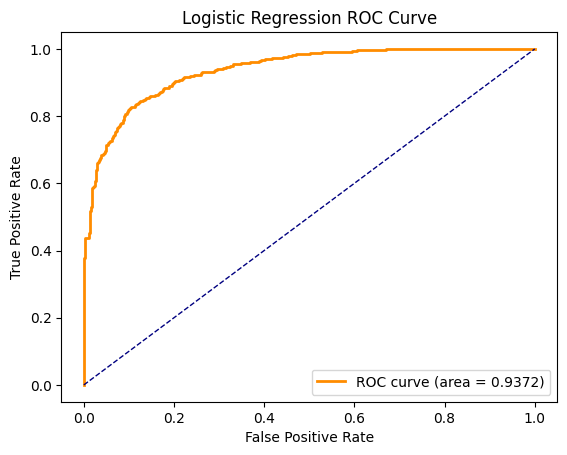

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       947
           1       0.85      0.85      0.85       853

    accuracy                           0.86      1800
   macro avg       0.86      0.86      0.86      1800
weighted avg       0.86      0.86      0.86      1800



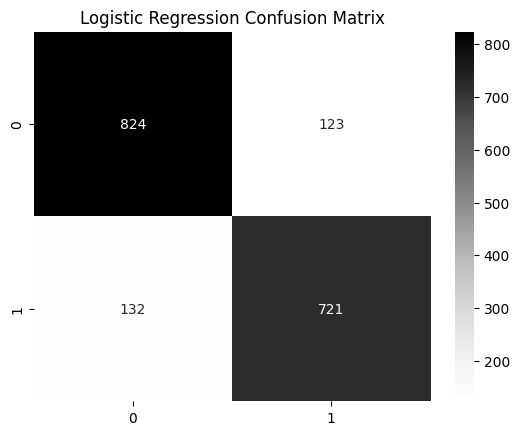

In [292]:
best_logistic_regression = grid_search_eval("Logistic Regression",LogisticRegression(random_state=42),param_grid_logistic)

Decision Tree Best params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best CV accuracy: 0.86
Test accuracy: 0.8622
ROC-AUC: 0.9215



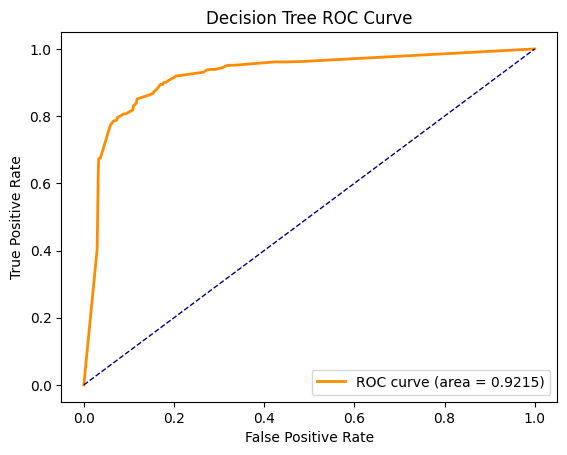

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       947
           1       0.87      0.84      0.85       853

    accuracy                           0.86      1800
   macro avg       0.86      0.86      0.86      1800
weighted avg       0.86      0.86      0.86      1800



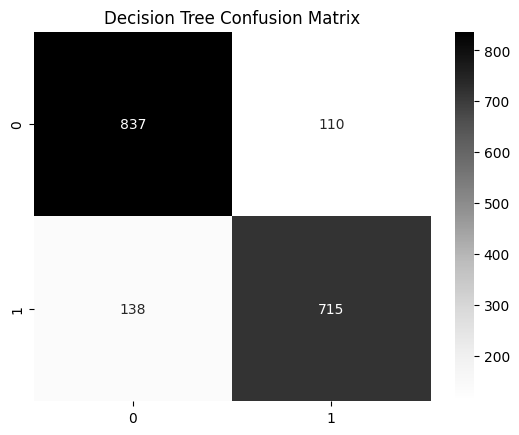

In [293]:
best_decision_tree = grid_search_eval("Decision Tree",DecisionTreeClassifier(random_state=42),param_grid_decision_tree)

Random Forest Best params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV accuracy: 0.89
Test accuracy: 0.8817
ROC-AUC: 0.9567



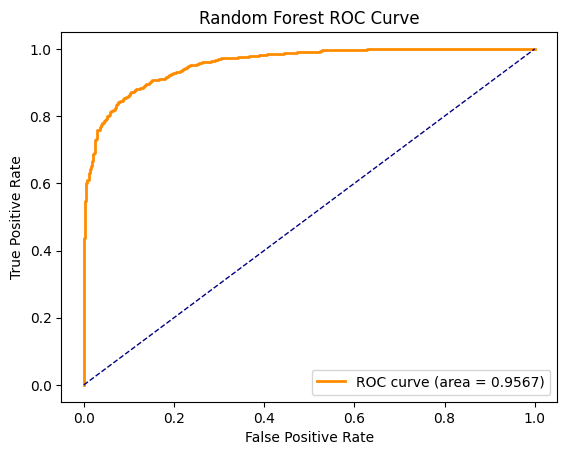

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       947
           1       0.89      0.85      0.87       853

    accuracy                           0.88      1800
   macro avg       0.88      0.88      0.88      1800
weighted avg       0.88      0.88      0.88      1800



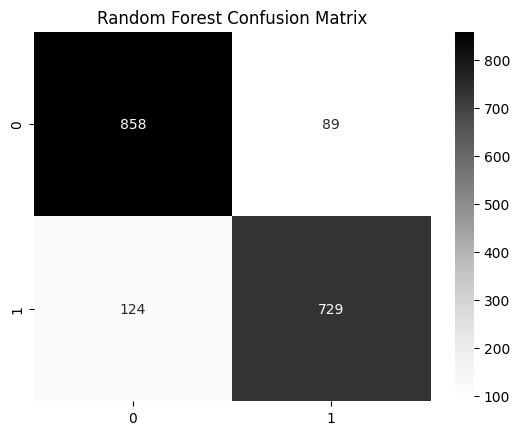

In [294]:
best_random_forest = grid_search_eval("Random Forest",RandomForestClassifier(random_state=42),param_grid_random_forest)

Gradient Boosting Best params: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best CV accuracy: 0.89
Test accuracy: 0.8844
ROC-AUC: 0.9579



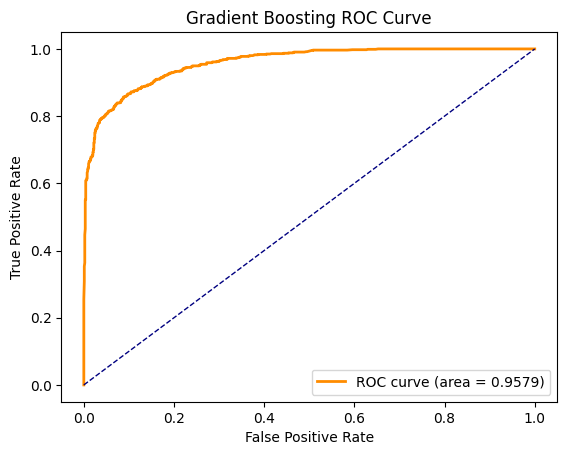

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       947
           1       0.90      0.85      0.87       853

    accuracy                           0.88      1800
   macro avg       0.89      0.88      0.88      1800
weighted avg       0.89      0.88      0.88      1800



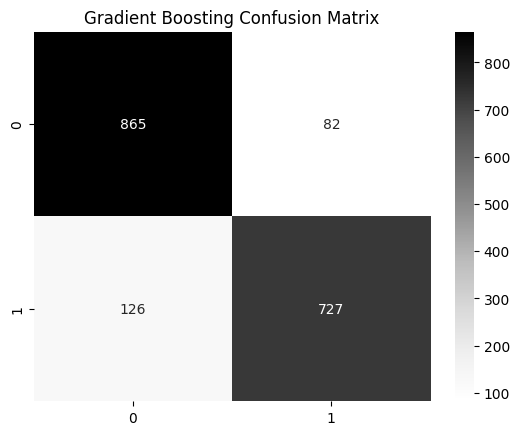

In [295]:
best_gradient_boosting = grid_search_eval("Gradient Boosting",GradientBoostingClassifier(random_state=42),param_grid_gradient_boosting)

AdaBoost Best params: {'learning_rate': 1.0, 'n_estimators': 100}
Best CV accuracy: 0.88
Test accuracy: 0.8694
ROC-AUC: 0.9484



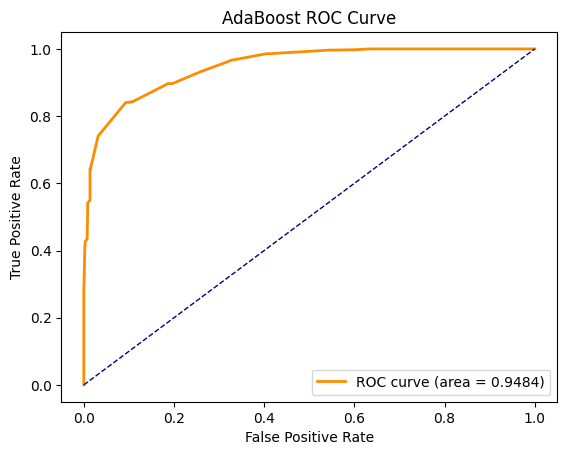

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       947
           1       0.88      0.84      0.86       853

    accuracy                           0.87      1800
   macro avg       0.87      0.87      0.87      1800
weighted avg       0.87      0.87      0.87      1800



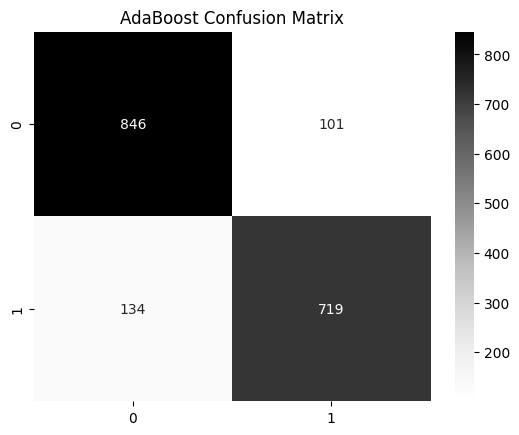

In [296]:
# Run grid search
best_adaboost = grid_search_eval("AdaBoost", AdaBoostClassifier(random_state=42), param_grid_adaboost)

In [297]:
import pickle
pickle.dump(best_logistic_regression, open('/Users/maksatkaparov/Downloads/logistic_regression.pkl', 'wb'))
pickle.dump(best_decision_tree, open('/Users/maksatkaparov/Downloads/decision_tree.pkl', 'wb'))
pickle.dump(best_random_forest, open('/Users/maksatkaparov/Downloads/random_forest.pkl', 'wb'))
pickle.dump(best_gradient_boosting, open('/Users/maksatkaparov/Downloads/gradient_boosting.pkl', 'wb'))
pickle.dump(best_adaboost, open('/Users/maksatkaparov/Downloads/ada_boosting.pkl', 'wb'))
#It saves the models with all their learned parameters.

## Model Interpretation

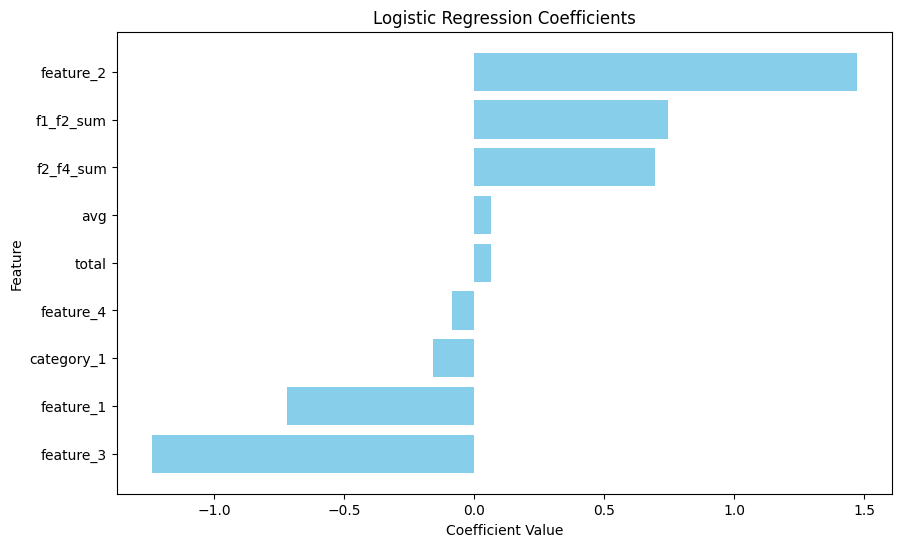

In [298]:
#Logistic Regression Feature Importance
coefficients = best_logistic_regression.coef_[0]
features = X_train.columns

coefficients_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.gca().invert_yaxis()
plt.show()

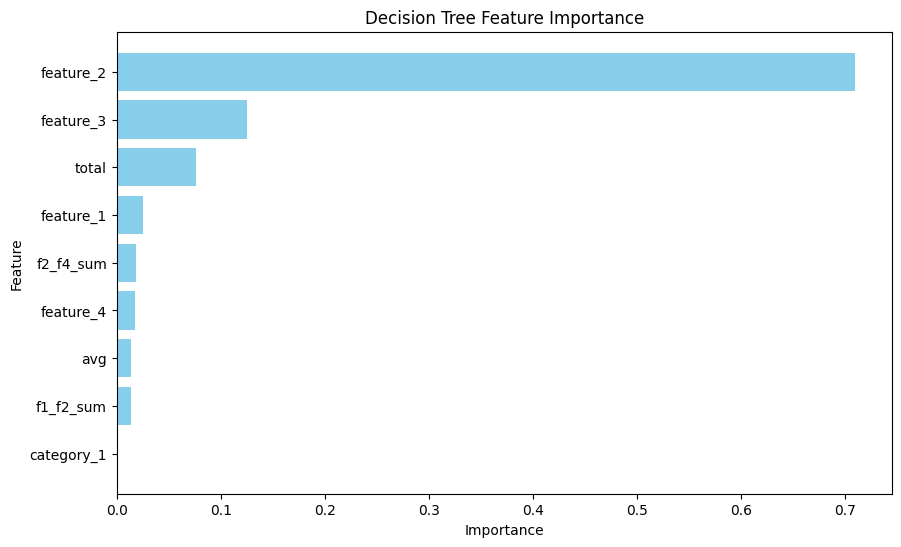

In [299]:
# Extract feature importance values
dt_feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_decision_tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot Decision Tree Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(dt_feature_importances['Feature'], dt_feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.gca().invert_yaxis()
plt.show()

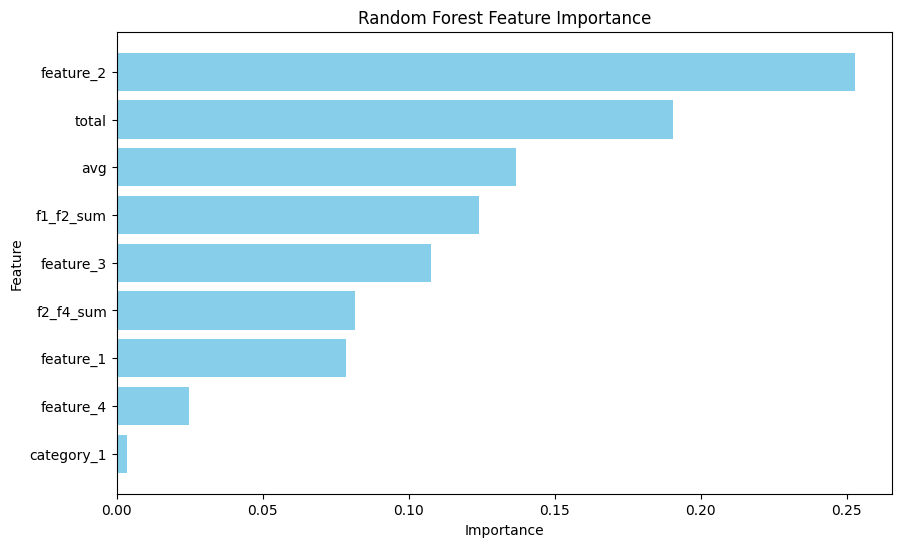

In [300]:
# Extract feature importance values
rf_feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_random_forest.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot Random Forest Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importances['Feature'], rf_feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()

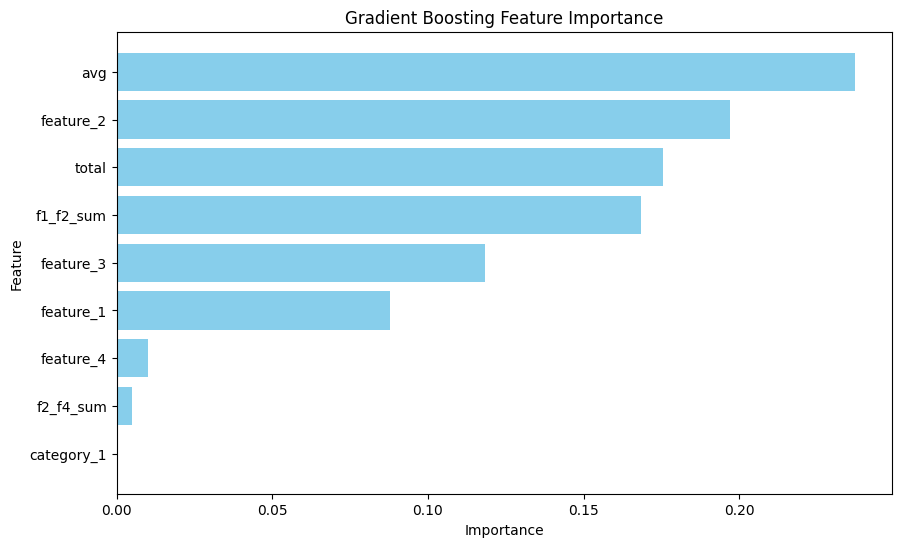

In [301]:
# Extract feature importance values
gb_feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_gradient_boosting.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot Gradient Boosting Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(gb_feature_importances['Feature'], gb_feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Feature Importance')
plt.gca().invert_yaxis()
plt.show()

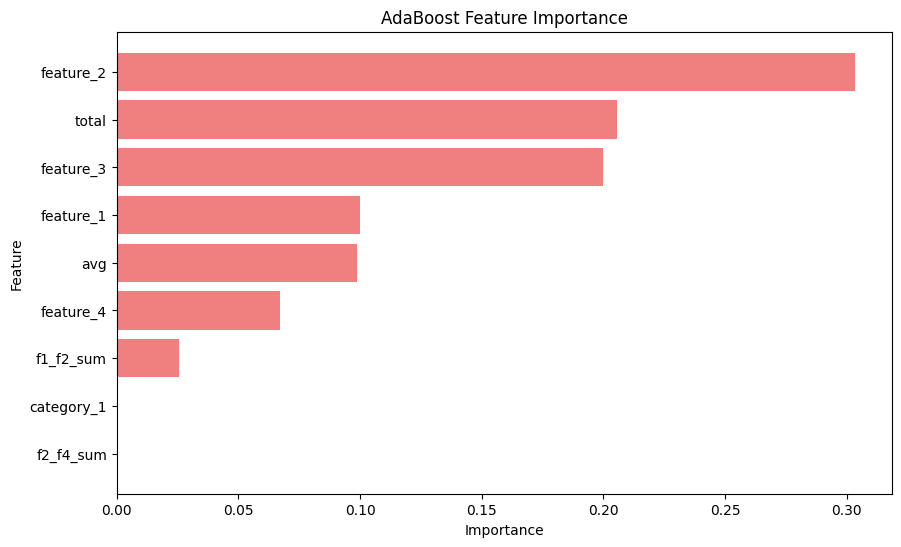

In [302]:
# Extract feature importance values from AdaBoost
adaboost_feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_adaboost.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot AdaBoost Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(adaboost_feature_importances['Feature'], adaboost_feature_importances['Importance'], color='lightcoral')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('AdaBoost Feature Importance')
plt.gca().invert_yaxis()
plt.show()


In [303]:
!pip install shap
import shap

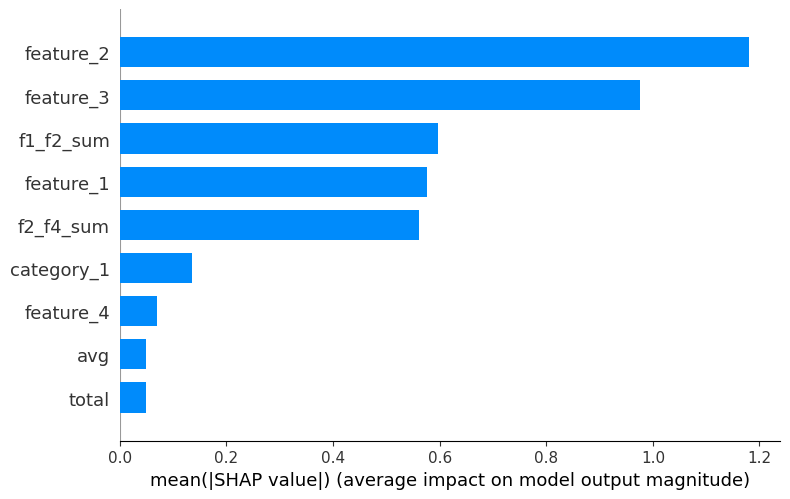

In [304]:
# SHAP for logistic regression 

# Assuming X_train has the correct column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

explainer = shap.Explainer(best_logistic_regression, X_train_scaled_df)
shap_values = explainer(X_train_scaled_df)

shap.summary_plot(shap_values, X_train_scaled_df, plot_type="bar")
plt.show()


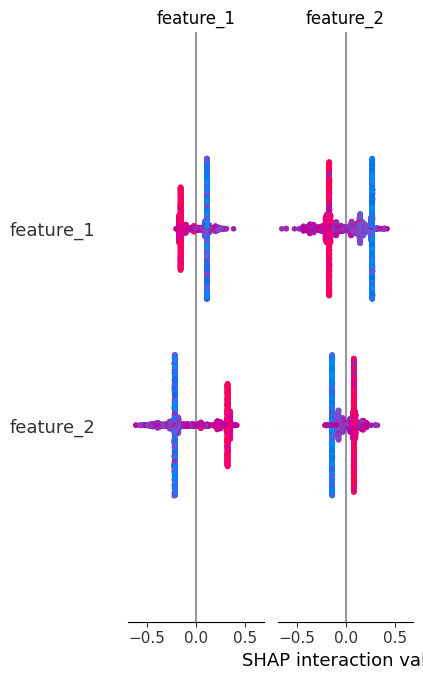

In [305]:
#shap for decision tree
# Initialize SHAP Explainer for Decision Tree
explainer = shap.Explainer(best_decision_tree, X_test_scaled)
shap_values = explainer(X_test_scaled)

shap.summary_plot(shap_values.values, X_test_scaled, feature_names=X_train.columns)
plt.show()

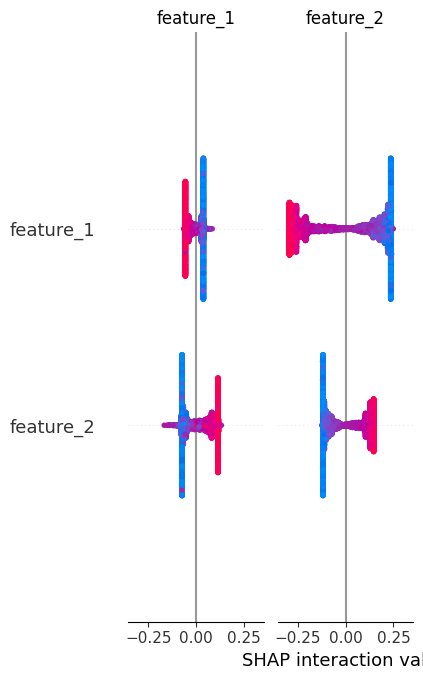

In [306]:
# SHAP for Random Forest
explainer_rf = shap.TreeExplainer(best_random_forest)
shap_values_rf = explainer_rf.shap_values(X_train)

shap.summary_plot(shap_values_rf, X_train, plot_type="bar")

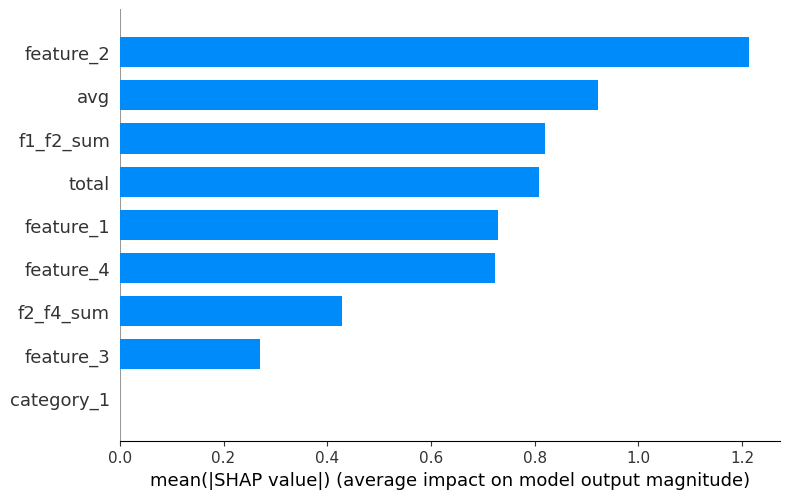

In [315]:
# SHAP for Gradient Boosting
explainer_gb = shap.TreeExplainer(best_gradient_boosting)
shap_values_gb = explainer_gb.shap_values(X_train)
shap.summary_plot(shap_values_gb, X_train, plot_type="bar")

  0%|          | 0/100 [00:00<?, ?it/s]

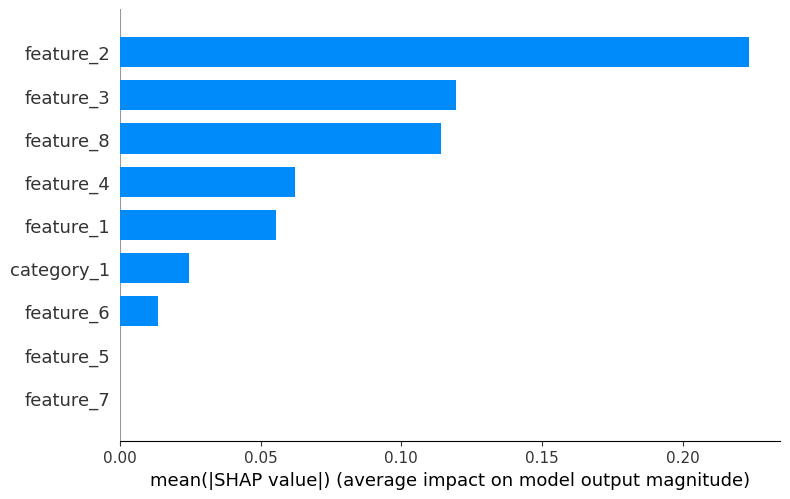

In [368]:
# Ensure categorical features are encoded before computing the median
X_train_clean = X_train.copy()

# Convert categorical variables using label encoding
for col in X_train_clean.select_dtypes(include=['object']).columns:
    X_train_clean[col] = X_train_clean[col].astype("category").cat.codes

# Fill NaN values with the median after encoding
X_train_clean = X_train_clean.fillna(X_train_clean.median())

# Match feature columns manually (get the column names from X_train)
expected_features = list(best_adaboost.estimators_[0].feature_importances_)  # Use the first estimator in AdaBoost
X_train_clean = X_train_clean.iloc[:, :len(expected_features)]  # Keep only the correct number of features

# Select a small subset for computational efficiency
X_sample = X_train_clean.sample(n=100, random_state=42)

# Create an explainer using KernelExplainer
explainer = shap.KernelExplainer(best_adaboost.predict, shap.sample(X_train_clean, 100))  

# Compute SHAP values
shap_values = explainer.shap_values(X_sample)

# Plot summary
shap.summary_plot(shap_values, X_sample, plot_type="bar")